In [1]:
import pickle
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
import datetime
import random
from networkx.algorithms import community
from collections import defaultdict
import pandas as pd
import numpy as np

In [2]:
nx.__version__, pd.__version__

('2.5', '1.1.1')

In [3]:
def call_graph(file):
    infile = open(file,'rb')
    G = pickle.load(infile)
    infile.close()
    return G

In [4]:
def show_graph(G,draw=False):
    print('nodes:', len(G), 'edges:', len(G.edges()),type(G))
    print('node :', list(G.nodes(data=True))[1])
    print('edge :', list(G.edges(data=True))[1])
    if draw == True:
        nx.draw(G,with_labels=True)
        plt.show

In [5]:
def graph_nodes_to_csv(G,filename):
    nodelist = []
    for n, d in G.nodes(data=True):
        node_data = dict()
        node_data['node'] = n
        node_data.update(d)
        nodelist.append(node_data)
        return pd.DataFrame(nodelist)  #.to_csv(filename)  

In [6]:
def graph_edges_to_csv(G,filename):
    edgelist = []
    for n1, n2, d in G.edges(data=True):
        edgeinfo = {'node1':n1, 'node2':n2}
        edgeinfo.update(d)
        edgelist.append(edgeinfo)
    return pd.DataFrame(edgelist) #.to_csv(filename)  
    

In [7]:
def ECDF(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Barbell graph C

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]
nodes: 11 edges: 22 <class 'networkx.classes.graph.Graph'>
node : (1, {})
edge : (0, 2, {})


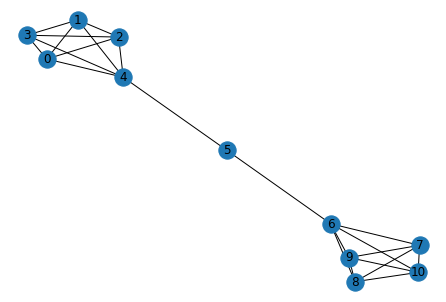

In [8]:
C = nx.barbell_graph(m1=5, m2=1)
#the nodes involved in each maximal clique 
nx.find_cliques(C)
print(list(nx.find_cliques(C)))
show_graph(C, True)

## <b>Complete Graph</b> A

In [9]:
A =nx.complete_graph(4)
A.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])

In [10]:
A.nodes[0]['blue'] = [0,0,255]
A.nodes[1]['green'] = [0,128,0]
A.nodes[2]['red'] = [255,0,0]
A.nodes[3]['yelow'] = [255,255,0]

In [11]:
A.edges[0,1]['weight'] = 1.0
A.edges[0,2]['weight'] = 2.0
A.edges[0,3]['weight'] = 3.0
A.edges[1,2]['weight'] = 4.0
A.edges[1,3]['weight'] = 5.0
A.edges[2,3]['weight'] = 6.0

In [12]:
# return list of all edges weight
edges = A.edges(2)
sum([A[u][v]['weight'] for u,v in edges])

12.0

In [13]:
A.edges(1,data=True)

EdgeDataView([(1, 0, {'weight': 1.0}), (1, 2, {'weight': 4.0}), (1, 3, {'weight': 5.0})])

In [14]:
def words_rank(G):
    wordsrank = []
    for i in range(len(G.nodes())):
        edges = G.edges(i)
        wordsrank.append((list(A.nodes()[i].keys())[0], sum([G[u][v]['weight'] for u,v in edges])))
    wordsrank.sort(reverse=True)
    return wordsrank       

In [15]:
words_rank(A)

[('yelow', 14.0), ('red', 12.0), ('green', 10.0), ('blue', 6.0)]

In [16]:
A.nodes[0][4] = [6]
A.nodes[1][3] = [10]
A.nodes[2][2] = [12]
A.nodes[3][1] = [14]

In [17]:
A.nodes(data=True)

NodeDataView({0: {'blue': [0, 0, 255], 4: [6]}, 1: {'green': [0, 128, 0], 3: [10]}, 2: {'red': [255, 0, 0], 2: [12]}, 3: {'yelow': [255, 255, 0], 1: [14]}})

In [18]:
# find node with rank N
def find_rank(A,N):
    list_rank = [n for n in A.nodes() if list(A.nodes()[n].keys())[1] == N]
    return list(A.nodes()[list_rank[0]].keys())[0]
    

In [19]:
# rank from 1 
find_rank(A,1)

'yelow'

In [20]:
list(A.nodes(data=True))[0][1].keys()

dict_keys(['blue', 4])

<function matplotlib.pyplot.show(close=None, block=None)>

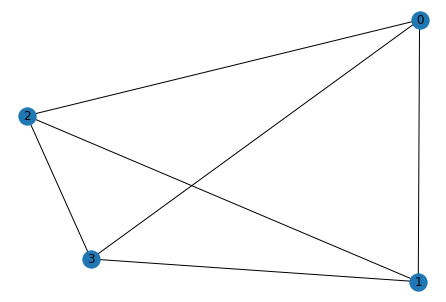

In [21]:
nx.draw(A,with_labels=True)
plt.show

## Bipartite graphs B

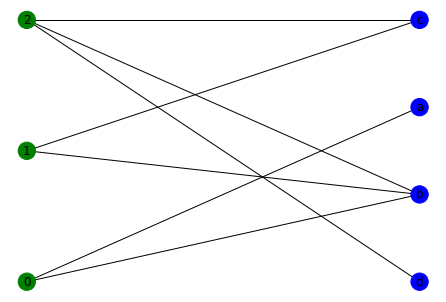

In [22]:
B = nx.Graph()
numbers = range(3)
B.add_nodes_from(numbers, bipartite='customers', color= 'g')
letters = ['a', 'b','c','d']
B.add_nodes_from(letters, bipartite='products', color='b')
B.add_edges_from([(0,'a'), (0,'b'),(1,'b'), (2,'d'),(1,'c'), (2,'b'),(2,'c')])

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos, with_labels=True, node_color=[i[1]['color'] for i in B.nodes(data=True)])
plt.show()

In [23]:
#Validating partitions
Validating=community.is_partition(B, [(0,1,2),('a','b','c','d')])
Validating

True

# Introduction to network
In this chapter, you'll be introduced to fundamental concepts in network analytics while exploring a real-world Twitter network dataset. You'll also learn about NetworkX, a library that allows you to manipulate, analyze, and model graph data. You'll learn about the different types of graphs and how to rationally visualize them.

In [24]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4,5])
G.add_edge(1,2)

G.nodes[1]['label'] = 'blue'
G.nodes[2]['label'] = [1,2,3]

G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {'label': [1, 2, 3]}, 3: {}, 4: {}, 5: {}})

In [25]:
G.edges(data=True)

EdgeDataView([(1, 2, {})])

<function matplotlib.pyplot.show(close=None, block=None)>

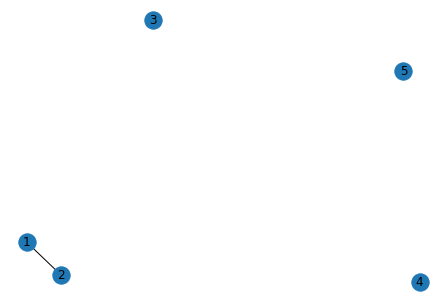

In [26]:
nx.draw(G, with_labels=True)
plt.show

## Introduction to network

### Basics of NetworkX API, using Twitter network

In [27]:
infile = open('ego-twitter.p','rb')
T = pickle.load(infile)
infile.close()

In [28]:
len(T),type(T)

(23369, networkx.classes.digraph.DiGraph)

In [29]:
list(T.nodes(data=True))[0]

(1, {'category': 'I', 'occupation': 'politician'})

In [30]:
# five edges of node 1
list(T.edges(1,data=True))[:5]

[(1, 3, {'date': datetime.date(2012, 11, 16)}),
 (1, 4, {'date': datetime.date(2013, 6, 7)}),
 (1, 5, {'date': datetime.date(2009, 7, 27)}),
 (1, 6, {'date': datetime.date(2014, 12, 18)}),
 (1, 7, {'date': datetime.date(2010, 10, 18)})]

### Basic drawing of a network using NetworkX

In [31]:
G_sub_nodes = (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49)
G_sub_edges = (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (16, 18), (16, 35), (16, 36), (16, 48), (18, 16), (18, 24), (18, 35), (18, 36), (19, 5), (19, 8), (19, 11), (19, 13), (19, 15), (19, 17), (19, 20), (19, 21), (19, 24), (19, 30), (19, 31), (19, 35), (19, 36), (19, 37), (19, 48), (28, 1), (28, 5), (28, 7), (28, 8), (28, 11), (28, 14), (28, 15), (28, 17), (28, 20), (28, 21), (28, 24), (28, 25), (28, 27), (28, 29), (28, 30), (28, 31), (28, 35), (28, 36), (28, 37), (28, 44), (28, 48), (28, 49), (36, 5), (36, 24), (36, 35), (36, 37), (37, 24), (37, 35), (37, 36), (39, 1), (39, 24), (39, 33), (39, 35), (39, 36), (39, 38), (39, 40), (39, 41), (39, 45), (42, 1), (43, 24), (43, 29), (43, 35), (43, 36), (43, 37), (43, 47), (43, 48), (45, 1), (45, 39), (45, 41) 

G_sub = nx.Graph()
G_sub.add_nodes_from(G_sub_nodes)

for i,j in G_sub_edges:
    G_sub.add_edge(i,j)
    

In [32]:
H = T.subgraph(list(range(200)))

In [33]:
list(H.nodes(data=True))

[(1, {'category': 'I', 'occupation': 'politician'}),
 (3, {'category': 'D', 'occupation': 'celebrity'}),
 (4, {'category': 'I', 'occupation': 'politician'}),
 (5, {'category': 'I', 'occupation': 'scientist'}),
 (6, {'category': 'D', 'occupation': 'politician'}),
 (7, {'category': 'I', 'occupation': 'politician'}),
 (8, {'category': 'I', 'occupation': 'celebrity'}),
 (9, {'category': 'D', 'occupation': 'scientist'}),
 (10, {'category': 'D', 'occupation': 'celebrity'}),
 (11, {'category': 'I', 'occupation': 'celebrity'}),
 (12, {'category': 'I', 'occupation': 'celebrity'}),
 (13, {'category': 'P', 'occupation': 'scientist'}),
 (14, {'category': 'D', 'occupation': 'celebrity'}),
 (15, {'category': 'P', 'occupation': 'scientist'}),
 (16, {'category': 'P', 'occupation': 'politician'}),
 (17, {'category': 'I', 'occupation': 'scientist'}),
 (18, {'category': 'I', 'occupation': 'celebrity'}),
 (19, {'category': 'I', 'occupation': 'scientist'}),
 (20, {'category': 'P', 'occupation': 'scientist'

<function matplotlib.pyplot.show(close=None, block=None)>

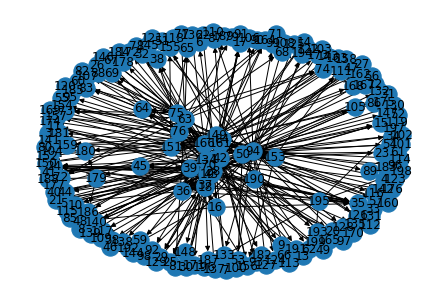

In [34]:
nx.draw(H, with_labels=True)
plt.show

### Queries on a graph

In [35]:
list(T.nodes(data=True))[0], list(T.edges(data=True))[0] 

((1, {'category': 'I', 'occupation': 'politician'}),
 (1, 3, {'date': datetime.date(2012, 11, 16)}))

In [36]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

In [37]:
# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010, 1, 1)]

## Types of graphs

In [38]:
type(H)

networkx.classes.digraph.DiGraph

### Specifying a weight on edges

In [39]:
# Set the weight of the edge
T.edges[1,3]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T.edges[u,v]['weight'] = 1.1

In [40]:
list(G_sub.edges(data=True))[:5]

[(1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {})]

In [41]:
G_sub.edges[1,3]['weight'] = 1.1
G_sub.edges[1,4]['weight'] = 2.1
G_sub.edges[1,6]['weight'] = 3.1

### Checking whether there are self-loops in the graph

In [42]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G (excluding the metadata)
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

In [43]:
# Check whether number of self loops equals the number of nodes in self loops
len(find_selfloop_nodes(T))

42

## Network visualization

### Visualizing using Matrix plots

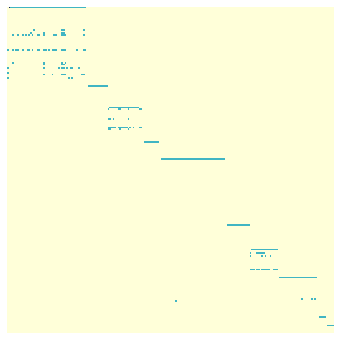

In [44]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(H)

# Draw m to the screen
m.draw()

In [45]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [46]:
show_graph(T)

nodes: 23369 edges: 33142 <class 'networkx.classes.digraph.DiGraph'>
node : (3, {'category': 'D', 'occupation': 'celebrity'})
edge : (1, 4, {'date': datetime.date(2013, 6, 7)})


### Visualizing using Circos plots

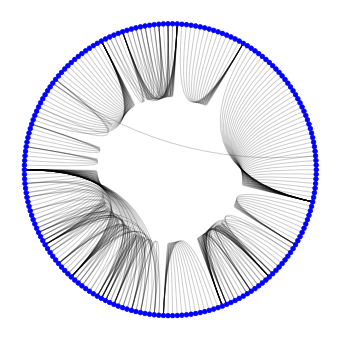

In [47]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(H)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

In [48]:
#[len(list(H.neighbors(n))) for n in H.nodes()]

The degree centrality is the number of neighbors divided by all possible neighbors that it could have.

In [49]:
nx.degree_centrality(H)

{1: 0.25888324873096447,
 3: 0.005076142131979695,
 4: 0.005076142131979695,
 5: 0.02030456852791878,
 6: 0.005076142131979695,
 7: 0.01015228426395939,
 8: 0.015228426395939085,
 9: 0.005076142131979695,
 10: 0.005076142131979695,
 11: 0.015228426395939085,
 12: 0.005076142131979695,
 13: 0.01015228426395939,
 14: 0.01015228426395939,
 15: 0.015228426395939085,
 16: 0.03045685279187817,
 17: 0.015228426395939085,
 18: 0.03045685279187817,
 19: 0.08121827411167512,
 20: 0.015228426395939085,
 21: 0.015228426395939085,
 22: 0.005076142131979695,
 23: 0.005076142131979695,
 24: 0.04060913705583756,
 25: 0.01015228426395939,
 26: 0.005076142131979695,
 27: 0.01015228426395939,
 28: 0.11675126903553298,
 29: 0.015228426395939085,
 30: 0.015228426395939085,
 31: 0.015228426395939085,
 32: 0.005076142131979695,
 33: 0.01015228426395939,
 34: 0.005076142131979695,
 35: 0.04568527918781726,
 36: 0.06091370558375634,
 37: 0.04060913705583756,
 38: 0.01015228426395939,
 39: 0.055837563451776644,

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

In [50]:
nx.betweenness_centrality(H)

{1: 0.0038589039676784416,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 2.589868434683518e-05,
 17: 0.0,
 18: 1.294934217341759e-05,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.00019424013260126386,
 37: 0.0,
 38: 0.0,
 39: 7.769605304050554e-05,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0008503401360544216,
 64: 9.496184260506232e-05,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 1.7265789564556787e-05,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.00041006250215822374,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86

### Visualizing using Arc plots

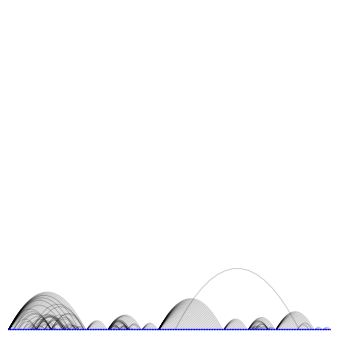

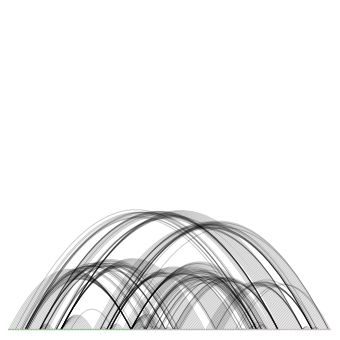

In [51]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(H)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(H,node_order='category',node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

# Important nodes chapter 2
You'll learn about ways to identify nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality.

In [52]:
show_graph(T)

nodes: 23369 edges: 33142 <class 'networkx.classes.digraph.DiGraph'>
node : (3, {'category': 'D', 'occupation': 'celebrity'})
edge : (1, 4, {'date': datetime.date(2013, 6, 7)})


## Degree centrality

In [53]:
# number of neigbors of node 1
len(list(T.neighbors(1)))

47

In [54]:
#nx.degree_centrality(H)

### Compute number of neighbors for each node

In [55]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

In [56]:
# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
len(six_nbrs)

25

### Compute degree distribution
The number of neighbors that a node has is called its <b>"degree"</b>

In [57]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]
#degrees

### Degree centrality distribution

The degree centrality is the number of neighbors divided by all possible neighbors that it could have. 

In [58]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

In [59]:
deg_cent

{1: 0.0025676138308798357,
 3: 0.00012838069154399176,
 4: 4.279356384799726e-05,
 5: 0.0005991098938719616,
 6: 0.0002995549469359808,
 7: 0.0002995549469359808,
 8: 0.0002567613830879835,
 9: 0.0002567613830879835,
 10: 8.558712769599452e-05,
 11: 0.00034234851078397807,
 12: 0.0002139678192399863,
 13: 8.558712769599452e-05,
 14: 0.00017117425539198904,
 15: 0.0002567613830879835,
 16: 0.0012410133515919205,
 17: 0.00034234851078397807,
 18: 0.0011126326600479288,
 19: 0.0012410133515919205,
 20: 0.00034234851078397807,
 21: 0.0002567613830879835,
 22: 4.279356384799726e-05,
 23: 4.279356384799726e-05,
 24: 0.0018401232454638822,
 25: 8.558712769599452e-05,
 26: 4.279356384799726e-05,
 27: 0.0002139678192399863,
 28: 0.001497774734679904,
 29: 0.00038514207463197534,
 30: 0.0002995549469359808,
 31: 0.0006419034577199589,
 32: 4.279356384799726e-05,
 33: 8.558712769599452e-05,
 34: 0.00265320095857583,
 35: 0.001968503937007874,
 36: 0.0029099623416638134,
 37: 0.0021824717562478604

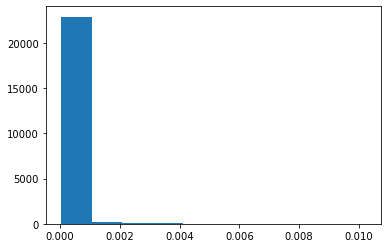

In [60]:
# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

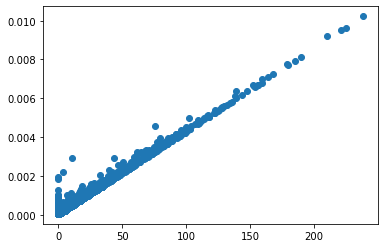

In [61]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()), marker='o');
plt.show()

## Graph algorithms

<b>Breadth-first search (BFS)</b>

### Shortest Path I, II, III

In [62]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [64]:
path_exists(G, 1,2)

Path exists between nodes 1 and 2


True

## Betweenness centrality

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

num. shortest paths through node/all possible shortest paths

In [65]:
G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

<function matplotlib.pyplot.show(close=None, block=None)>

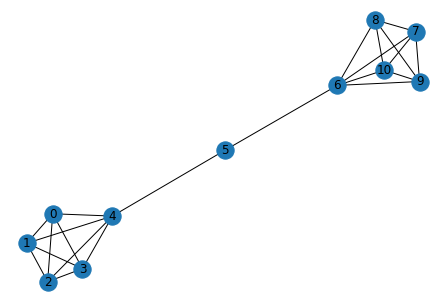

In [66]:
nx.draw(G, with_labels=True)
plt.show

### NetworkX betweenness centrality on a social network

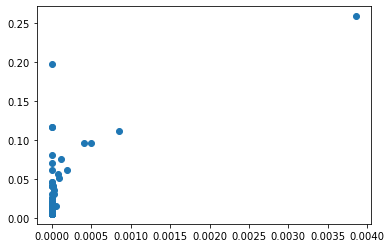

In [67]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(H)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(H)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()), marker='o');

# Display the plot
plt.show()

### Deep dive - Twitter network

In [68]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [69]:
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(H)
print(top_dc)

{1}


In [70]:
# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(H)[node] == max(nx.degree_centrality(H).values())

### Deep dive - Twitter network part II

In [71]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [72]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(H)
top_bc

{1}

In [73]:
# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(H)[node] == max(nx.betweenness_centrality(H).values())

# Structures chapter 3

## Cliques & communities

<function matplotlib.pyplot.show(close=None, block=None)>

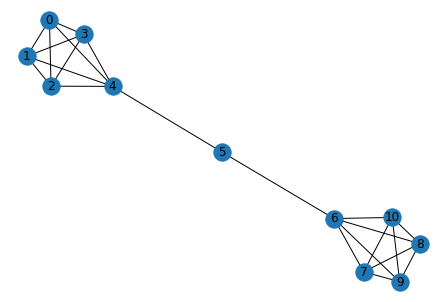

In [74]:
nx.draw(G, with_labels=True)
plt.show

### Identifying triangle relationships

In [75]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [76]:
is_in_triangle(G, 4)

True

### Finding nodes involved in triangles

In [77]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
         if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [78]:
nodes_in_triangle(G, 4)

{0, 1, 2, 3, 4}

### Finding open triangles

In [79]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

In [80]:
# Compute the number of open triangles in G
num_open_triangles = 0

# Iterate over all the nodes in G
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G, n):

        # Increment num_open_triangles
       num_open_triangles += 1

num_open_triangles

3

## Maximal cliques

In [81]:
# import matplotlib.pyplot as plt
import networkx as nx
G = nx.barbell_graph(m1=5, m2=1)
#the nodes involved in each maximal clique 
nx.find_cliques(G)
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

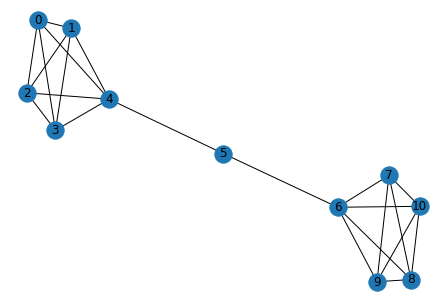

In [82]:
nx.draw(G, with_labels=True)
plt.show()

### Finding all maximal cliques of size "n"

In [83]:
# Define maximal_cliques()
def maximal_cliques(G,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [84]:
maximal_cliques(G, 5), maximal_cliques(G, 2)

([[4, 0, 1, 2, 3], [6, 7, 8, 9, 10]], [[4, 5], [6, 5]])

## Subgraphs

In [85]:
import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.2)

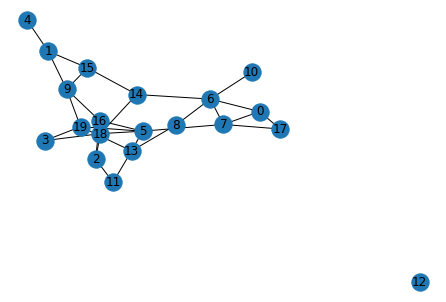

In [86]:
nx.draw(G, with_labels=True)
plt.show()

In [87]:
print(G.nodes())
nodes = list(G.neighbors(4))
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1]


In [88]:
nodes.append(4)
nodes

[1, 4]

[(1, 4)]


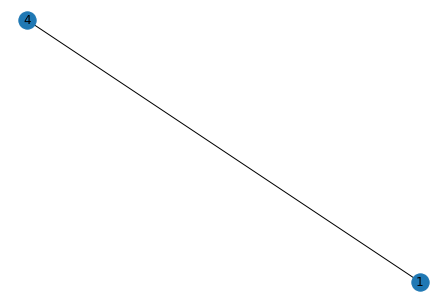

In [89]:
G_eight = G.subgraph(nodes)
print(G_eight.edges())
nx.draw(G_eight, with_labels=True)

### Subgraphs I

In [90]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

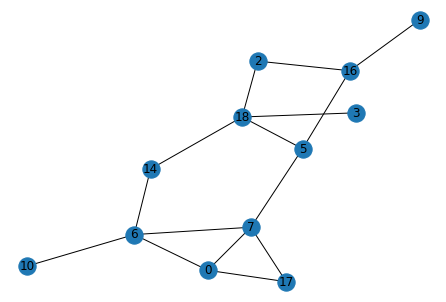

In [91]:
nodes_of_interest = [10,16,17,18]
#nodes_of_interest = [29, 38, 42] #for graph T, H
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

### Subgraphs II

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors.

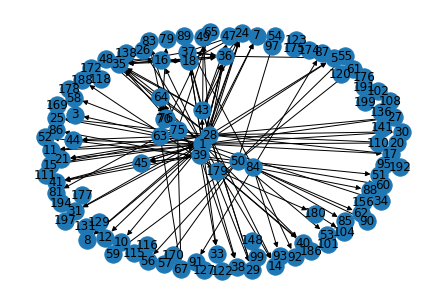

In [92]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in H.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = H.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = H.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub, with_labels=True)
plt.show()

# Bringing it all together 

## Case study I

In [93]:
# list of nodes 'u0' - 'u63'
#['u' + str(i) for i in list(range(63))]

In [94]:
nodes_list =['u41', 'u69', 'u96', 'u156', 'u297', 'u298', 'u315', 'u322', 'u435', 'u440', 'u640', 'u655', 'u698', 'u821', 'u863', 'u901', 'u914', 'u1254', 'u1407', 'u1468', 'u1908', 'u2022', 'u2066', 'u2137', 'u2289', 'u2482', 'u2552', 'u2643', 'u2737', 'u2906', 'u3083', 'u3174', 'u3231', 'u3243', 'u3271', 'u3658', 'u3974', 'u3979', 'u4159', 'u4199', 'u4329', 'u4412', 'u4513', 'u4710', 'u4761', 'u4953', 'u5082', 'u5337', 'u5693', 'u5993', 'u6081', 'u7418', 'u7623', 'u7963', 'u8135', 'u9866', 'u9869', 'u9997', 'u10090', 'u10340', 'u10500', 'u10603', 'u14964']

In [96]:
infile = open('github_users.p','rb')
G_git = pickle.load(infile)
infile.close()
H_git = G_git.subgraph(nodes_list)

In [97]:
show_graph(G_git)

nodes: 56519 edges: 72900 <class 'networkx.classes.graph.Graph'>
node : ('u2', {'bipartite': 'users'})
edge : ('u1', 'u1814', {})


nodes: 63 edges: 282 <class 'networkx.classes.graph.Graph'>
node : ('u2066', {'bipartite': 'users'})
edge : ('u4159', 'u640', {})


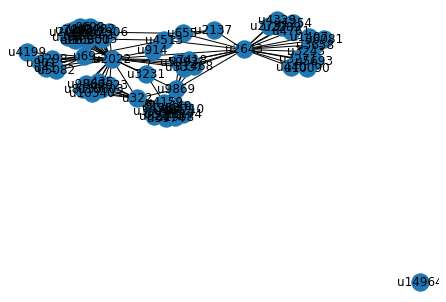

In [98]:
show_graph(H_git,True)

nodes: 10 edges: 5 <class 'networkx.classes.graph.Graph'>
node : (1, {})
edge : (1, 2, {})


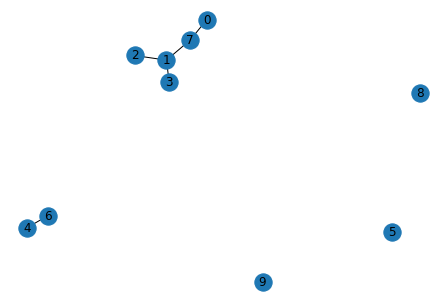

In [99]:
random.seed(50)
G = nx.erdos_renyi_graph(n=10, p=0.2)
show_graph(G, True)

### Characterizing the network (II) degree centrality 

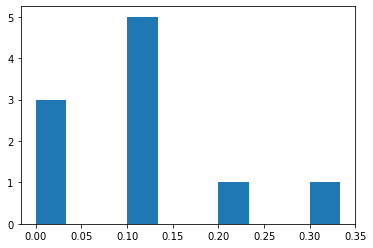

In [100]:
deg_cent = nx.degree_centrality(G)
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(deg_cent.values()))
plt.show()

### Characterizing the network (III) betweenness centrality 

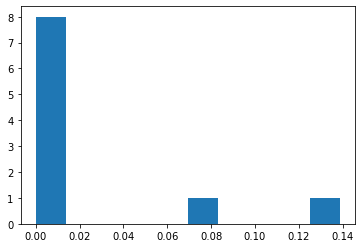

In [101]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

## Case study part II: Visualization

In [102]:
def connected_component_subgraphs(G):
    connected_component_subgraph = (G.subgraph(c) for c in nx.connected_components(G))
    return connected_component_subgraph

In [103]:
connected_component_subgraphs(G)

<generator object connected_component_subgraphs.<locals>.<genexpr> at 0x0000024F8526FAC0>

In [104]:
def connected_component_subgraphs_list(G):
    """
    Return list of conected subgraphs
    """
    connected_component_subgraph = sorted(connected_component_subgraphs(G), key=lambda x: len(x), reverse=True)
    connected_component = []
    for i in range(len(connected_component_subgraph)):
        connected_component.append(list(connected_component_subgraph[i]))    
    return connected_component

In [105]:
connected_component_subgraphs_list(G)

[[0, 1, 2, 3, 7], [4, 6], [5], [8], [9]]

In [106]:
for g in list(connected_component_subgraphs(G)):
    print(len(g.nodes()))

5
2
1
1
1


### MatrixPlot

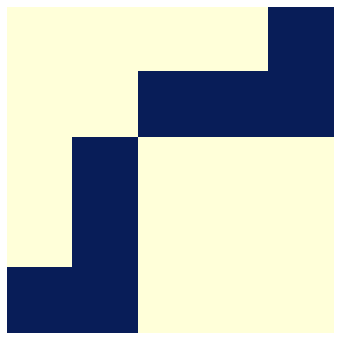

In [107]:
largest_ccs = sorted(connected_component_subgraphs(G), key=lambda x: len(x), reverse=True)[0]

# Create the customized MatrixPlot object: h
h = nv.MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

<i>In a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.</i>

### ArcPlot

In [108]:
def draw_arc_plot(G):
    # Iterate over all the nodes in G, including the metadata
    for n, d in G.nodes(data=True):
        # Calculate the degree of each node: G.node[n]['degree']
        G.nodes[n]['degree'] = nx.degree(G,n)

    # Create the ArcPlot object: a
    a = nv.ArcPlot(G, node_order='degree')
    
    # Draw the ArcPlot to the screen
    a.draw()
    plt.show()
    
    return show_graph(G)

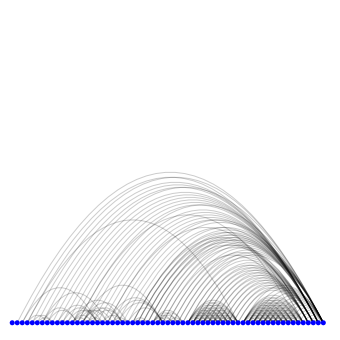

nodes: 63 edges: 282 <class 'networkx.classes.graph.Graph'>
node : ('u2066', {'bipartite': 'users', 'degree': 13})
edge : ('u4159', 'u640', {})


In [109]:
draw_arc_plot(H_git)

### CircosPlot

In [110]:
def draw_circos_plot(G,degree):
    # Iterate over all the nodes in G, including the metadata
    for n, d in G.nodes(data=True):
        # Calculate the degree of each node: G.node[n]['degree']
        G.nodes[n]['degree'] = nx.degree(G,n)
        if nx.degree(G,n) == degree:
            G.nodes[n]['grouping'] = 1
        else:
            G.nodes[n]['grouping'] = 0
    
    # Create the CircosPlot object: c
    c = nv.CircosPlot(G,node_order='degree',node_grouping='grouping' ,node_color='grouping')
    
    # Draw the ArcPlot to the screen
    c.draw()
    plt.show()
    
    return list(G.nodes(data=True))

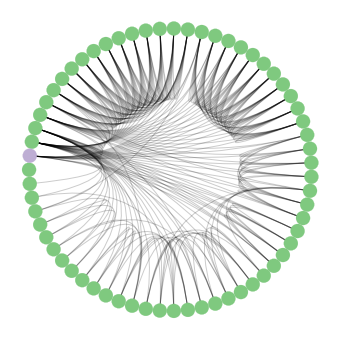

[('u4159', {'bipartite': 'users', 'degree': 13, 'grouping': 0}),
 ('u2066', {'bipartite': 'users', 'degree': 13, 'grouping': 0}),
 ('u435', {'bipartite': 'users', 'degree': 7, 'grouping': 0}),
 ('u14964', {'bipartite': 'users', 'degree': 0, 'grouping': 0}),
 ('u4329', {'bipartite': 'users', 'degree': 5, 'grouping': 0}),
 ('u3231', {'bipartite': 'users', 'degree': 3, 'grouping': 0}),
 ('u655', {'bipartite': 'users', 'degree': 5, 'grouping': 0}),
 ('u9997', {'bipartite': 'users', 'degree': 13, 'grouping': 0}),
 ('u2552', {'bipartite': 'users', 'degree': 13, 'grouping': 0}),
 ('u901', {'bipartite': 'users', 'degree': 5, 'grouping': 0}),
 ('u10090', {'bipartite': 'users', 'degree': 4, 'grouping': 0}),
 ('u322', {'bipartite': 'users', 'degree': 19, 'grouping': 0}),
 ('u3174', {'bipartite': 'users', 'degree': 12, 'grouping': 0}),
 ('u640', {'bipartite': 'users', 'degree': 12, 'grouping': 0}),
 ('u1254', {'bipartite': 'users', 'degree': 5, 'grouping': 0}),
 ('u2289', {'bipartite': 'users', 'd

In [111]:
draw_circos_plot(H_git,18)

## Case study part III: Cliques

### Finding cliques 

number of maximal cliques : 2


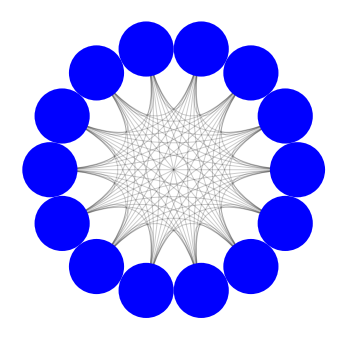

In [112]:
# Calculate the maximal cliques in G: cliques
cliques = max(nx.find_cliques(H_git))

# Count and print the number of maximal cliques in G
print('number of maximal cliques :',len(list(cliques)))

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(H_git), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = H_git.subgraph(largest_clique)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

### external part  - community algorithms

In [113]:
from networkx.algorithms import community

nodes: 63 edges: 282 <class 'networkx.classes.graph.Graph'>
node : ('u2066', {'bipartite': 'users', 'degree': 13, 'grouping': 0})
edge : ('u4159', 'u640', {})


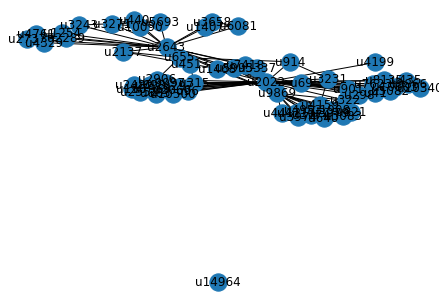

In [114]:
G = H_git
show_graph(G,True)

In [115]:
# Girvan_newman
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
Girv_com = sorted(map(sorted, next_level_communities))
len(Girv_com)

4

In [116]:
# Kernighan–Lin bipartition algorithm
kernighan = community.kernighan_lin_bisection(G)
len(kernighan)

2

In [117]:
#Label propagation
propagation=community.label_propagation_communities(G)
len(list(propagation))

6

In [118]:
#Modularity-based communities
Modularity=community.greedy_modularity_communities(G)
len(Modularity)

6

In [119]:
#Label propagation
propagation=community.label_propagation_communities(G)
len(list(propagation))

6

## Case study part IV: Final tasks

### Finding important collaborators

In [120]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(H_git)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u2022']


### Characterizing editing communities

In [121]:
G = H_git

In [122]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy() 

<i><b>Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.</i></b> 

In [123]:
# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.nodes[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# structure of node    
list(G_lmc.nodes(data=True))[0]

('u698',
 {'bipartite': 'users',
  'degree': 13,
  'grouping': 0,
  'degree centrality': 0.3611111111111111})

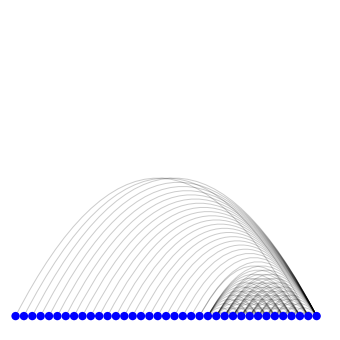

In [124]:
# Create the ArcPlot object: a
a = nv.ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### Recommending co-editors who have yet to edit together

In [125]:
G = H_git
show_graph(G,draw=False)

nodes: 63 edges: 282 <class 'networkx.classes.graph.Graph'>
node : ('u2066', {'bipartite': 'users', 'degree': 13, 'grouping': 0})
edge : ('u4159', 'u640', {})


In [126]:
"""
Compile a list of GitHub users that should be recommended to collaborate with one another.
"""

# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
           recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('u2022', 'u4159'), ('u655', 'u2022')]


# Bipartite graphs & product recommendation systems
In this chapter, you will learn about bipartite graphs and how they are used in recommendation systems. You will explore the GitHub dataset from the previous course, this time analyzing the underlying bipartite graph that was used to create the graph that you used earlier. Finally, you will get a chance to build the basic components of a recommendation system using the GitHub data!

types of graph: Graph  DiGraph  MultiGraph  MultiDiGraph

### Plotting using nxviz

## Bipartite graphs


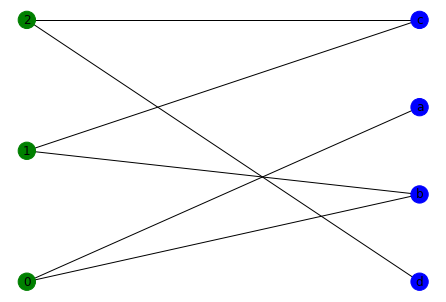

In [127]:
B = nx.Graph()
numbers = range(3)
B.add_nodes_from(numbers, bipartite='customers', color= 'green')
letters = ['a', 'b','c','d']
B.add_nodes_from(letters, bipartite='products', color='blue')
B.add_edges_from([(0,'a'), (0,'b'),(1,'b'), (2,'d'),(1,'c'), (2,'c')])

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos, with_labels=True, node_color=[i[1]['color'] for i in B.nodes(data=True)])
plt.show()

In [128]:
cust_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 'customers']
nx.bipartite.degree_centrality(B, cust_nodes)

{0: 0.5,
 1: 0.5,
 2: 0.5,
 'd': 0.3333333333333333,
 'b': 0.6666666666666666,
 'a': 0.3333333333333333,
 'c': 0.6666666666666666}

### The bipartite keyword   get_nodes_from_partition()

In [129]:
def get_nodes_from_partition(G, partition):
    """
    Function that returns the nodes from 
    a given partition in a bipartite graph.
    """
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [130]:
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(B, 'products')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(B, 'costumers')))

4
0


### Degree centrality distribution of user nodes

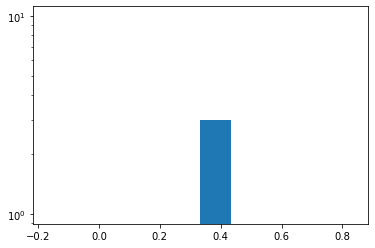

In [131]:
# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(B, 'customers')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(B)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs)
plt.show()

## Bipartite graphs and recommendation systems


nodes: 11 edges: 22 <class 'networkx.classes.graph.Graph'>
node : (1, {})
edge : (0, 2, {})


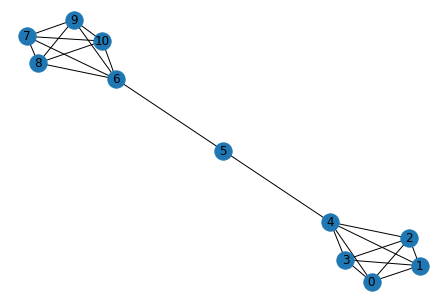

In [132]:
show_graph(C, True)

In [133]:
user1_nbrs = list(C.neighbors(0))
user1_nbrs

[1, 2, 3, 4]

In [134]:
user5_nbrs = list(C.neighbors(5))
user5_nbrs

[4, 6]

In [135]:
set(user1_nbrs).intersection(user5_nbrs)

{4}

In [136]:
set(user5_nbrs).difference(user1_nbrs)

{6}

### Shared nodes in other partition

In [137]:
def shared_partition_nodes(G, node1, node2):
    """
    Function that takes a two nodes, and returns 
    the set of repository nodes that are shared between 
    the two user nodes.
    """
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

In [138]:
print(len(shared_partition_nodes(B, 1, 2)))

1


### User similarity metric

In [139]:
def user_similarity(G, user1, user2, proj_nodes):
    """
     Function computes a metric of similarity between two users: 
     the number of projects shared between two users divided 
     by the total number of nodes in the other partition.    
    """
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'customers'
    assert G.nodes[user2]['bipartite'] == 'customers'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

In [140]:
# Compute the similarity score between two users 
project_nodes = get_nodes_from_partition(B, 'products')
user_similarity(B, 0, 1, project_nodes)

0.25

### Find similar users

Function finds the users most similar to another given user

In [141]:
#from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    """
    Function finds the users most similar to another given user
    """    
    # Data checks
    assert G.nodes[user]['bipartite'] == 'customers'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

In [142]:
user_nodes = get_nodes_from_partition(B, 'customers')
most_similar_users(B, 0, user_nodes, project_nodes)

[1]

### Recommend repositories

In [143]:
def recommend_repositories(G, from_user, to_user):
    """
    returns the repositories that the from_user is connected to that the to_user is not connected to.
    """
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

In [144]:
recommend_repositories(B, 0, 1)

{'a'}

# Graph projections
In this chapter, you will use a famous American Revolution dataset to dive deeper into exploration of bipartite graphs. Here, you will learn how to create the unipartite projection of a bipartite graph, a very useful method for simplifying a complex network for further analysis. Additionally, you will learn how to use matrices to manipulate and analyze graphs - with many computing routines optimized for matrices, you'll be able to analyze many large graphs quickly and efficiently!

In [145]:
df = pd.read_csv('american-revolution.csv')
df.rename(columns={'Unnamed: 0': 'names'}, inplace=True)
df = df.set_index('names')

In [146]:
df2 = pd.concat([df, df.T]).fillna(0)
df2 = df2.reindex(df2.columns)
df2.head()

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies,Adams.John,Adams.Samuel,Allen.Dr,...,Whitwell.William,Williams.Jeremiah,Williams.Jonathan,Williams.Thomas,Willis.Nathaniel,Wingfield.William,Winslow.John,Winthrop.John,Wyeth.Joshua,Young.Thomas
StAndrewsLodge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
LoyalNine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NorthCaucus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
LongRoomClub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TeaParty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [147]:
R = nx.from_numpy_matrix(df2.values)
R = nx.relabel_nodes(R, dict(enumerate(df2.columns)))

nodes: 261 edges: 319 <class 'networkx.classes.graph.Graph'>
node : ('LoyalNine', {})
edge : ('StAndrewsLodge', 'Barrett.Samuel', {'weight': 1.0})


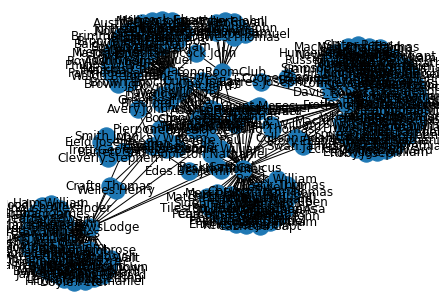

In [148]:
show_graph(R,True)

## Concept of projection


### Reading graphs

In [149]:
# Assign nodes to 'clubs' or 'people' partitions
for n, d in R.nodes(data=True):
    if '.' in n:
        R.nodes[n]['bipartite'] = 'people'
        R.nodes[n]['color'] = 'blue'
    else:
        R.nodes[n]['bipartite'] = 'clubs'
        R.nodes[n]['color'] = 'green'

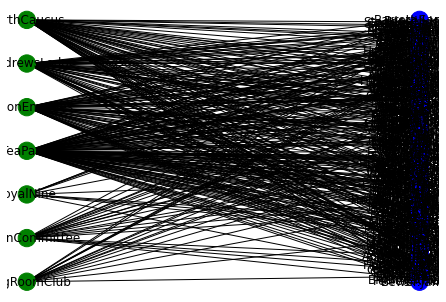

In [150]:
top = nx.bipartite.sets(R)[0]
pos = nx.bipartite_layout(R, top)
nx.draw(R, pos=pos, with_labels=True, node_color=[i[1]['color'] for i in R.nodes(data=True)])
plt.show()

### Computing projection
computing the projection of a bipartite graph to the nodes on one of its partitions.

In [151]:
# Prepare the nodelists needed for computing projections: people, clubs
# This exercise shows you two ways to do it, one with `data=True` and one without.
people = [n for n in R.nodes() if R.nodes[n]['bipartite'] == 'people']
clubs = [n for n, d in R.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(R, people)
clubsG = nx.bipartite.projected_graph(R, clubs)

In [152]:
people

['Adams.John',
 'Adams.Samuel',
 'Allen.Dr',
 'Appleton.Nathaniel',
 'Ash.Gilbert',
 'Austin.Benjamin',
 'Austin.Samuel',
 'Avery.John',
 'Baldwin.Cyrus',
 'Ballard.John',
 'Barber.Nathaniel',
 'Barnard.Samuel',
 'Barrett.Samuel',
 'Bass.Henry',
 'Bell.William',
 'Blake.Increase',
 'Boit.John',
 'Bolter.Thomas',
 'Boyer.Peter',
 'Boynton.Richard',
 'Brackett.Jos',
 'Bradford.John',
 'Bradlee.David',
 'Bradlee.Josiah',
 'Bradlee.Nathaniel',
 'Bradlee.Thomas',
 'Bray.George',
 'Breck.William',
 'Bewer.James',
 'Brimmer.Herman',
 'Brimmer.Martin',
 'Broomfield.Henry',
 'Brown.Hugh',
 'Brown.Enoch',
 'Brown.John',
 'Bruce.Stephen',
 'Burbeck.Edward',
 'Burbeck.William',
 'Burt.Benjamin',
 'Burton.Benjamin',
 'Cailleteau.Edward',
 'Callendar.Elisha',
 'Campbell.Nicholas',
 'Cazneau.Capt',
 'Chadwell.Mr',
 'Champney.Caleb',
 'Chase.Thomas',
 'Cheever.Ezekiel',
 'Chipman.Seth',
 'Chrysty.Thomas',
 'Church.Benjamin',
 'Clarke.Benjamin',
 'Cleverly.Stephen',
 'Cochran.John',
 'Colesworthy.Gilbe

In [153]:
list(peopleG.nodes(data=True))[:5]

[('Adams.John', {'bipartite': 'people', 'color': 'blue'}),
 ('Adams.Samuel', {'bipartite': 'people', 'color': 'blue'}),
 ('Allen.Dr', {'bipartite': 'people', 'color': 'blue'}),
 ('Appleton.Nathaniel', {'bipartite': 'people', 'color': 'blue'}),
 ('Ash.Gilbert', {'bipartite': 'people', 'color': 'blue'})]

In [154]:
list(clubsG.nodes(data=True))[:5]

[('StAndrewsLodge', {'bipartite': 'clubs', 'color': 'green'}),
 ('LoyalNine', {'bipartite': 'clubs', 'color': 'green'}),
 ('NorthCaucus', {'bipartite': 'clubs', 'color': 'green'}),
 ('LongRoomClub', {'bipartite': 'clubs', 'color': 'green'}),
 ('TeaParty', {'bipartite': 'clubs', 'color': 'green'})]

### Plot degree centrality on projection
Comparation of the degree centrality distributions for each of the following graphs: the original graph G, the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in degree centrality score computation between bipartite and unipartite versions of degree centrality metrics.

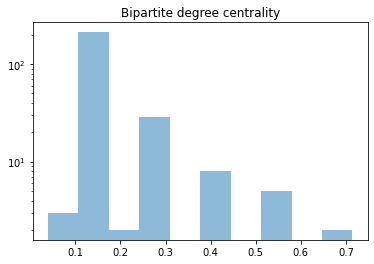

In [155]:
# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure() 
original_dc = nx.bipartite.degree_centrality(R, people)  
# Remember that you can cast a dictionary values to a list.
plt.hist(original_dc.values(), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()

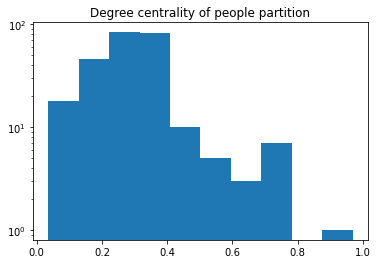

In [156]:
# Plot the degree centrality distribution of the peopleG graph
plt.figure()
people_dc = nx.degree_centrality(peopleG)
plt.hist(people_dc.values())
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

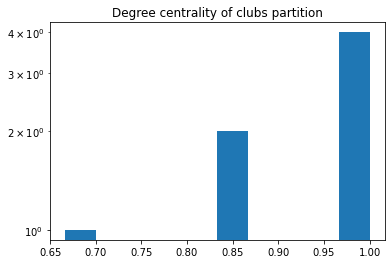

In [157]:
# Plot the degree centrality distribution of the clubsG graph
plt.figure()
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(clubs_dc.values())
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

<i>The distributions are quite different from one another. The disjoint histogram from the clubsG graph stems from its small number of nodes (only 7), while the peopleG histogram is more contiguous because of the large number of nodes in there. The bipartite degree centrality histogram has discrete values: this again stems from having only a small number of clubs nodes that the people nodes can connect to.</i>

## Bipartite graphs as matrices

In [158]:
cust_nodes = [n for n in B.nodes() if B.nodes[n]
['bipartite'] == 'customers']

prod_nodes = [n for n in B.nodes() if B.nodes[n]
['bipartite'] == 'products']

mat = nx.bipartite.biadjacency_matrix(B,
row_order=cust_nodes, column_order=prod_nodes)

<b>bipartite adjacency matrices</b>

In [159]:
#Matrix multiplication 
mat @ mat.T

<3x3 sparse matrix of type '<class 'numpy.intc'>'
	with 7 stored elements in Compressed Sparse Row format>

In [160]:
mat.T @ mat

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 10 stored elements in Compressed Sparse Column format>

### Compute adjacency matrix

In [161]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(R, 'people')
clubs_nodes = get_nodes_from_partition(R, 'clubs')

In [162]:
# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(R, row_order=people_nodes, column_order=clubs_nodes)

In [163]:
# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T
user_matrix

<254x254 sparse matrix of type '<class 'numpy.float64'>'
	with 19666 stored elements in Compressed Sparse Row format>

### Find shared membership: Transposition
you lose the metadata from a graph when you go to a sparse matrix representation. You're now going to learn how to impute the metadata back so that you can learn more about shared membership.

In [164]:
a = np.array([1, 5, 9, 5])
np.where(a == 5)[0]

array([1, 3], dtype=int64)

In [165]:
# Find out the names of people who were members of the most number of clubs

In [166]:
diag = user_matrix.diagonal() 
diag

array([2., 4., 1., 2., 1., 1., 1., 2., 1., 1., 4., 1., 2., 4., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 2., 1., 1., 4.,
       1., 1., 1., 1., 1., 1., 2., 3., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 3., 2., 1., 1., 2., 1., 5., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 1.

In [167]:
indices = np.where(diag == diag.max())[0]
print('indices :',indices)
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))  

indices : [199 235]
Number of clubs: 5.0
People with the most number of memberships:
- Revere.Paul
- Warren.Joseph


In [168]:
user_matrix

<254x254 sparse matrix of type '<class 'numpy.float64'>'
	with 19666 stored elements in Compressed Sparse Row format>

In [169]:
# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()
users_coo

<254x254 sparse matrix of type '<class 'numpy.float64'>'
	with 19666 stored elements in COOrdinate format>

In [170]:
# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0] 
print('People with most number of shared memberships:')
for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

People with most number of shared memberships:
- Adams.Samuel, Warren.Joseph
- Adams.Samuel, Church.Benjamin
- Bass.Henry, Chase.Thomas
- Chase.Thomas, Bass.Henry
- Church.Benjamin, Warren.Joseph
- Church.Benjamin, Adams.Samuel
- Revere.Paul, Warren.Joseph
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Revere.Paul


## Representing network data with pandas


### Make nodelist

In [171]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in peopleG.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

               person bipartite color
0          Adams.John    people  blue
1        Adams.Samuel    people  blue
2            Allen.Dr    people  blue
3  Appleton.Nathaniel    people  blue
4         Ash.Gilbert    people  blue


In [172]:
list(R.nodes(data=True))[0]

('StAndrewsLodge', {'bipartite': 'clubs', 'color': 'green'})

# Comparing graphs & time-dynamic graphs
In this chapter, you will delve into the fundamental ways that you can analyze graphs that change over time. You will explore a dataset describing messaging frequency between students, and learn how to visualize important evolving graph statistics.

In [173]:
import gzip
f=gzip.open('CollegeMsg.txt.gz','rb')
file_content=f.read()
f.close()

In [174]:
df = pd.read_csv('CollegeMsg.txt.gz', header=None, sep='\s+')

In [175]:
df.rename(columns={0: 'sender', 1: 'recipient',2:'date'}, inplace=True)

In [176]:
from datetime import datetime
df['date'] = [datetime.utcfromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S') for i in list(df.iloc[:,2].values)]

In [177]:
df['month'] = [int(i[6]) for i in df['date']]

In [178]:
df.head()

,sender,recipient,date,month
0,1,2,2004-04-15 14:56:01,4
1,3,4,2004-04-16 22:50:39,4
2,5,2,2004-04-19 22:39:51,4
3,6,7,2004-04-20 05:40:19,4
4,8,7,2004-04-20 05:42:36,4


In [179]:
type(df.date[0])

str

In [180]:
#[(i[:9],i[6],i[8:10]) for i in df['date']]

In [183]:
set(df['month'].values)

{0, 4, 5, 6, 7, 8, 9}

In [184]:
len(df[df['month'] ==0])

824

## Introduction to graph differences Time series analysis

### List of graphs
In this set of exercises, you'll use a college messaging dataset to learn how to filter graphs for time series analysis. In this dataset, nodes are students, and edges denote messages being sent from one student to another. The graph as it stands right now captures all communications at all time points.

Let's start by analyzing the graphs in which only the edges change over time.

In [185]:
data = df

months = [0, 4, 5, 6, 7, 8, 9]

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

7


In [186]:
Gs

In [187]:
show_graph(Gs[2])

nodes: 1899 edges: 9000 <class 'networkx.classes.graph.Graph'>
node : (3, {})
edge : (1, 302, {})


### Graph differences over time

In [188]:
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)


[4.667796610169492, 4.382775119617225, -0.7203333333333334, -0.5915772745331744, -0.31906614785992216, -0.28285714285714286]


### Plot number of edge changes over time

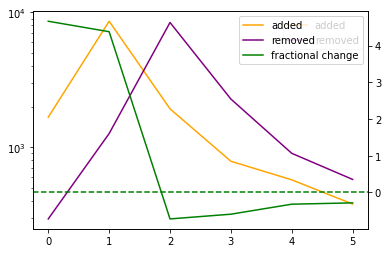

In [189]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

## Evolving graph statistics


### Number of edges over time
create a list of the number of edges per month. The index of this list will correspond to the months elapsed since the first month.

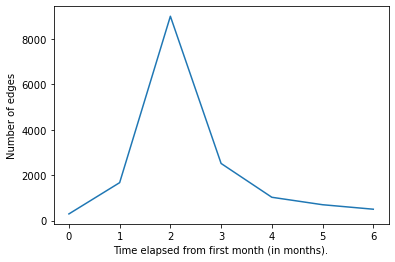

In [190]:
fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 

### Degree centrality over time

In [191]:
# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)

In [192]:
np.array(list(cents[0].values()))

array([0.00263435, 0.02002107, 0.        , ..., 0.00052687, 0.00052687,
       0.00052687])

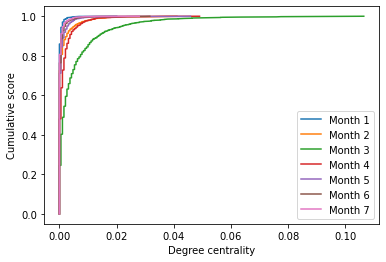

In [193]:
# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(np.array(list(cents[i].values())))
    plt.plot(x, y, label='Month {0}'.format(i+1))
plt.legend()  
plt.xlabel('Degree centrality')
plt.ylabel('Cumulative score')
plt.show()

<i>The degree centrality distribution gets smaller over time generally, but nodes in the 2nd month have the highest degree centrality scores overall.</i>

## Zooming in & zooming out: Overall graph summary


## Find nodes with top degree centralities
 take a deeper dive to see whether there's anything interesting about the most connected students in the network. First off, you'll find the cluster of students that have the highest degree centralities.

In [194]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
top_connected

[95, 1543, 1601, 1624, 1783, 1836]

### Visualizing connectivity

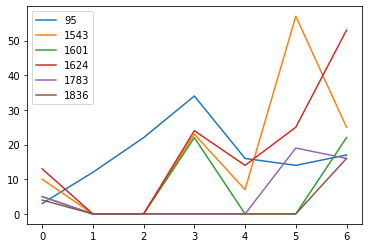

In [195]:
# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items():
    plt.plot(conn, label=n)
plt.legend()  
plt.show()

# Tying it up!
In this chapter, you will apply everything you've learned in the previous three chapters to a forum posting dataset. You will analyze the temporal changes in forum user connectivity patterns, and make visualizations of evolving graph statistics over time.

## Introduction to the dataset

In [197]:
student = ['s397', 's55', 's17', 's397', 's484', 's167', 's354', 's332',
       's47', 's381', 's65', 's197', 's348', 's495', 's17', 's192',
       's253', 's493', 's160', 's17', 's332', 's201', 's182', 's88',
       's455', 's860', 's736', 's455', 's403', 's260', 's275', 's111',
       's286', 's129', 's351', 's17', 's138', 's238', 's72', 's386',
       's192', 's316', 's95', 's183', 's53', 's28', 's204', 's137',
       's213', 's23', 's570', 's316', 's213', 's377', 's542', 's237',
       's203', 's328', 's170', 's398', 's714', 's395', 's13', 's23',
       's34', 's571', 's260', 's398', 's213', 's17', 's398', 's656',
       's183', 's572', 's634', 's513', 's347', 's129', 's198', 's805',
       's33', 's243', 's241', 's742', 's115', 's802', 's129', 's807',
       's513', 's116', 's645', 's546', 's363', 's380', 's67', 's192',
       's129', 's110', 's111', 's115', 's525', 's602', 's36', 's40',
       's373', 's138', 's67', 's802', 's2', 's879', 's17', 's52', 's316',
       's203', 's624', 's213', 's316', 's293', 's279', 's273', 's114',
       's279', 's395', 's65', 's622', 's314', 's89', 's597', 's77',
       's459', 's435', 's81', 's572', 's11', 's565', 's269', 's65',
       's213', 's65', 's207', 's539', 's597', 's781', 's44', 's443',
       's450', 's395', 's546', 's37', 's561', 's482', 's781', 's220',
       's681', 's624', 's124', 's116', 's169', 's348', 's655', 's277',
       's162', 's86', 's226', 's115', 's17', 's55', 's457', 's213', 's46',
       's86', 's129', 's24', 's20', 's475', 's73', 's649', 's522', 's528',
       's469', 's95', 's398', 's587', 's403', 's62', 's11', 's634',
       's277', 's462', 's734', 's213', 's805', 's754', 's320', 's23',
       's397', 's397', 's213', 's115', 's46', 's361', 's35', 's129',
       's860', 's18', 's433', 's795', 's201', 's28', 's38', 's642',
       's462', 's736', 's821', 's624', 's278', 's89', 's55', 's126',
       's183', 's213', 's213', 's101', 's72', 's314', 's420', 's675',
       's12', 's322', 's545', 's202', 's219', 's632', 's597', 's624',
       's243', 's171', 's296', 's361', 's397', 's395', 's450', 's129',
       's377', 's82', 's656', 's781', 's632', 's34', 's6', 's115', 's615',
       's56', 's539', 's95', 's111', 's481', 's299', 's512', 's138',
       's748', 's303', 's202', 's213', 's380', 's69', 's243', 's435',
       's754', 's226', 's86', 's396', 's213', 's315', 's882', 's86',
       's17', 's395', 's736', 's367', 's34', 's67', 's227', 's362',
       's203', 's99', 's656', 's510', 's455', 's218', 's176', 's361',
       's17', 's258', 's204', 's462', 's17', 's314', 's398', 's95',
       's213', 's28', 's882', 's202', 's111', 's34', 's398', 's49', 's86',
       's866', 's65', 's416', 's17', 's281', 's561', 's83', 's736',
       's100', 's435', 's736', 's597', 's111', 's331', 's260', 's736',
       's171', 's111', 's539', 's245', 's624', 's243', 's455', 's156',
       's397', 's40', 's855', 's349', 's197', 's213', 's395', 's296',
       's504', 's213', 's153', 's34', 's213', 's377', 's138', 's201',
       's71', 's361', 's736', 's642', 's204', 's213', 's825', 's335',
       's278', 's176', 's115', 's624', 's361', 's213', 's391', 's213',
       's24', 's17', 's539', 's202', 's460', 's630', 's204', 's147',
       's67', 's461', 's147', 's703', 's522', 's398', 's310', 's213',
       's213', 's176', 's315', 's202', 's99', 's353', 's631', 's396',
       's77', 's398', 's622', 's624', 's202', 's3', 's213', 's736', 's65',
       's663', 's219', 's805', 's260', 's563', 's295', 's25', 's142',
       's396', 's34', 's325', 's95', 's571', 's306', 's208', 's476',
       's65', 's395', 's159', 's634', 's35', 's367', 's518', 's95', 's17',
       's140', 's328', 's219', 's518', 's506', 's147', 's510', 's634',
       's183', 's150', 's736', 's213', 's281', 's754', 's34', 's65',
       's99', 's82', 's203', 's138', 's213', 's342', 's397', 's122',
       's156', 's93', 's754', 's173', 's703', 's89', 's138', 's209',
       's260', 's313', 's408', 's469', 's310', 's186', 's337', 's65',
       's571', 's247', 's263', 's113', 's132', 's758', 's205', 's226',
       's186', 's253', 's736', 's322', 's736', 's597', 's243', 's273',
       's162', 's569', 's213', 's513', 's106', 's183', 's59', 's615',
       's386', 's517', 's132', 's204', 's65', 's398', 's535', 's736',
       's382', 's192', 's201', 's18', 's569', 's567', 's805', 's781',
       's624', 's243', 's183', 's705', 's67', 's213', 's192', 's57',
       's95', 's510', 's375', 's50', 's95', 's290', 's116', 's622',
       's170', 's535', 's102', 's510', 's539', 's138', 's539', 's481',
       's112', 's150', 's202', 's38', 's381', 's514', 's315', 's213',
       's138', 's84', 's65', 's147', 's348', 's363', 's272', 's167',
       's510', 's864', 's279', 's397', 's51', 's395', 's278', 's129',
       's51', 's213', 's115', 's656', 's34', 's539', 's89', 's28', 's398',
       's535', 's160', 's805', 's443', 's469', 's132', 's207', 's108',
       's98', 's182', 's736', 's201', 's212', 's676', 's213', 's398',
       's277', 's58', 's277', 's279', 's17', 's147', 's156', 's656',
       's817', 's510', 's213', 's38', 's18', 's83', 's797', 's435',
       's129', 's65', 's805', 's148', 's206', 's270', 's95', 's87',
       's148', 's65', 's65', 's855', 's204', 's203', 's77', 's406',
       's150', 's644', 's67', 's24', 's239', 's316', 's213', 's634',
       's111', 's686', 's85', 's11', 's218', 's213', 's86', 's213', 's52',
       's805', 's651', 's788', 's192', 's226', 's391', 's34', 's395',
       's100', 's140', 's653', 's341', 's173', 's513', 's111', 's865',
       's138', 's279', 's77', 's113', 's395', 's89', 's17', 's316',
       's204', 's469', 's315', 's315', 's52', 's825', 's292', 's38',
       's689', 's395', 's395', 's315', 's597', 's73', 's242', 's736',
       's736', 's88', 's129', 's395', 's5', 's68', 's597', 's622', 's113',
       's213', 's11', 's274', 's361', 's378', 's24', 's805', 's111',
       's631', 's219', 's34', 's398', 's597', 's227', 's181', 's631',
       's150', 's813', 's515', 's693', 's825', 's60', 's1', 's167',
       's243', 's348', 's686', 's220', 's40', 's11', 's277', 's460',
       's86', 's303', 's469', 's234', 's237', 's115', 's18', 's24',
       's325', 's457', 's153', 's286', 's237', 's139', 's213', 's126',
       's469', 's500', 's138', 's302', 's528', 's443', 's455', 's132',
       's256', 's260', 's24', 's597', 's350', 's403', 's213', 's680',
       's435', 's348', 's325', 's632', 's243', 's213', 's290', 's281',
       's397', 's469', 's177', 's260', 's17', 's207', 's202', 's94',
       's571', 's223', 's169', 's86', 's203', 's147', 's546', 's167',
       's150', 's38', 's57', 's202', 's266', 's325', 's398', 's350',
       's28', 's500', 's602', 's622', 's499', 's586', 's234', 's597',
       's38', 's444', 's696', 's571', 's805', 's65', 's154', 's129',
       's99', 's213', 's138', 's796', 's5', 's825', 's443', 's656',
       's622', 's46', 's213', 's689', 's338', 's473', 's445', 's539',
       's443', 's218', 's100', 's674', 's243', 's322', 's203', 's72',
       's57', 's813', 's459', 's249', 's34', 's279', 's183', 's350',
       's396', 's281', 's38', 's242', 's206', 's396', 's657', 's393',
       's17', 's175', 's805', 's213', 's65', 's624', 's175', 's67',
       's111', 's40', 's866', 's213', 's570', 's546', 's517', 's203',
       's192', 's243', 's439', 's615', 's203', 's111', 's185', 's213',
       's266', 's23', 's213', 's303', 's167', 's314', 's687', 's572',
       's510', 's197', 's347', 's213', 's210', 's748', 's736', 's182',
       's61', 's213', 's129', 's281', 's213', 's435', 's573', 's181',
       's219', 's115', 's57', 's736', 's391', 's149', 's167', 's488',
       's332', 's213', 's34', 's375', 's825', 's270', 's781', 's39',
       's412', 's316', 's277', 's86', 's471', 's129', 's736', 's656',
       's801', 's571', 's813', 's213', 's490', 's101', 's34', 's84',
       's17', 's395', 's862', 's116', 's67', 's65', 's213', 's213', 's35',
       's147', 's176', 's805', 's160', 's138', 's154', 's395', 's825',
       's93', 's219', 's361', 's11', 's645', 's56', 's488', 's185',
       's138', 's90', 's488', 's395', 's67', 's436', 's77', 's350', 's24',
       's694', 's243', 's570', 's65', 's649', 's65', 's67', 's287', 's95',
       's65', 's499', 's60', 's52', 's53', 's274', 's469', 's395', 's11',
       's499', 's350', 's111', 's624', 's539', 's243', 's30', 's140',
       's571', 's181', 's349', 's173', 's260', 's42', 's203', 's95',
       's296', 's539', 's435', 's36', 's237', 's506', 's656', 's836',
       's182', 's259', 's243', 's736', 's38', 's213', 's573', 's656',
       's277', 's749', 's24', 's860', 's201', 's213', 's166', 's736',
       's137', 's398']

In [198]:
forum = ['f287', 'f19', 'f43', 'f427', 'f340', 'f43', 'f376', 'f4', 'f165',
       'f89', 'f136', 'f85', 'f49', 'f84', 'f35', 'f23', 'f395', 'f499',
       'f63', 'f43', 'f4', 'f10', 'f138', 'f83', 'f67', 'f27', 'f419',
       'f128', 'f259', 'f94', 'f130', 'f122', 'f73', 'f13', 'f242', 'f8',
       'f331', 'f240', 'f17', 'f360', 'f23', 'f7', 'f13', 'f89', 'f110',
       'f57', 'f367', 'f30', 'f82', 'f37', 'f13', 'f247', 'f168', 'f319',
       'f445', 'f302', 'f89', 'f11', 'f38', 'f13', 'f312', 'f107', 'f443',
       'f131', 'f1', 'f322', 'f322', 'f156', 'f168', 'f364', 'f335',
       'f158', 'f89', 'f456', 'f301', 'f63', 'f7', 'f26', 'f171', 'f500',
       'f13', 'f84', 'f85', 'f411', 'f84', 'f208', 'f307', 'f159', 'f78',
       'f231', 'f94', 'f19', 'f362', 'f74', 'f242', 'f85', 'f43', 'f28',
       'f414', 'f437', 'f294', 'f219', 'f54', 'f138', 'f54', 'f217',
       'f149', 'f456', 'f40', 'f259', 'f13', 'f120', 'f195', 'f299',
       'f136', 'f236', 'f217', 'f69', 'f285', 'f181', 'f163', 'f352',
       'f216', 'f44', 'f66', 'f195', 'f13', 'f17', 'f438', 'f145', 'f312',
       'f13', 'f33', 'f298', 'f405', 'f315', 'f329', 'f356', 'f360',
       'f17', 'f17', 'f35', 'f164', 'f361', 'f32', 'f349', 'f107', 'f307',
       'f24', 'f13', 'f320', 'f188', 'f19', 'f293', 'f189', 'f3', 'f164',
       'f58', 'f507', 'f341', 'f152', 'f214', 'f21', 'f43', 'f102', 'f8',
       'f169', 'f306', 'f231', 'f58', 'f158', 'f13', 'f256', 'f10', 'f66',
       'f314', 'f434', 'f16', 'f352', 'f190', 'f360', 'f63', 'f496',
       'f259', 'f376', 'f206', 'f188', 'f271', 'f1', 'f43', 'f132',
       'f324', 'f4', 'f2', 'f416', 'f73', 'f63', 'f10', 'f456', 'f58',
       'f226', 'f51', 'f29', 'f27', 'f98', 'f27', 'f51', 'f13', 'f434',
       'f76', 'f84', 'f166', 'f89', 'f418', 'f395', 'f188', 'f13', 'f19',
       'f89', 'f415', 'f212', 'f370', 'f460', 'f277', 'f208', 'f77',
       'f77', 'f1', 'f358', 'f210', 'f131', 'f84', 'f164', 'f84', 'f27',
       'f63', 'f26', 'f319', 'f225', 'f336', 'f161', 'f38', 'f156', 'f61',
       'f66', 'f51', 'f111', 'f452', 'f294', 'f73', 'f78', 'f84', 'f40',
       'f188', 'f63', 'f132', 'f339', 'f120', 'f259', 'f331', 'f130',
       'f13', 'f131', 'f63', 'f67', 'f3', 'f63', 'f24', 'f78', 'f121',
       'f158', 'f188', 'f73', 'f304', 'f38', 'f158', 'f289', 'f260',
       'f212', 'f54', 'f265', 'f48', 'f175', 'f139', 'f7', 'f63', 'f376',
       'f188', 'f54', 'f419', 'f270', 'f156', 'f13', 'f357', 'f25',
       'f156', 'f43', 'f41', 'f63', 'f32', 'f156', 'f63', 'f97', 'f111',
       'f43', 'f73', 'f157', 'f38', 'f132', 'f31', 'f399', 'f28', 'f250',
       'f278', 'f73', 'f270', 'f73', 'f161', 'f370', 'f26', 'f84', 'f158',
       'f173', 'f63', 'f33', 'f11', 'f30', 'f385', 'f80', 'f395', 'f84',
       'f455', 'f327', 'f82', 'f46', 'f84', 'f10', 'f85', 'f327', 'f43',
       'f319', 'f346', 'f123', 'f55', 'f152', 'f338', 'f168', 'f131',
       'f13', 'f195', 'f111', 'f168', 'f63', 'f84', 'f165', 'f89', 'f25',
       'f7', 'f116', 'f50', 'f110', 'f226', 'f357', 'f301', 'f338',
       'f256', 'f364', 'f17', 'f23', 'f184', 'f71', 'f277', 'f84', 'f104',
       'f341', 'f104', 'f334', 'f98', 'f231', 'f319', 'f94', 'f277',
       'f63', 'f183', 'f85', 'f256', 'f177', 'f16', 'f188', 'f134', 'f73',
       'f168', 'f122', 'f111', 'f20', 'f26', 'f212', 'f185', 'f496',
       'f50', 'f289', 'f350', 'f143', 'f108', 'f17', 'f298', 'f188',
       'f420', 'f94', 'f289', 'f230', 'f21', 'f193', 'f104', 'f475',
       'f239', 'f11', 'f188', 'f38', 'f7', 'f335', 'f194', 'f398', 'f214',
       'f11', 'f135', 'f185', 'f185', 'f97', 'f188', 'f188', 'f23',
       'f327', 'f89', 'f103', 'f158', 'f376', 'f150', 'f74', 'f240',
       'f16', 'f236', 'f338', 'f156', 'f39', 'f287', 'f127', 'f419',
       'f25', 'f136', 'f168', 'f367', 'f13', 'f409', 'f73', 'f44', 'f151',
       'f13', 'f168', 'f105', 'f19', 'f85', 'f33', 'f43', 'f333', 'f363',
       'f199', 'f12', 'f377', 'f240', 'f238', 'f218', 'f125', 'f63',
       'f124', 'f395', 'f424', 'f10', 'f2', 'f53', 'f475', 'f289', 'f218',
       'f357', 'f89', 'f129', 'f367', 'f221', 'f70', 'f94', 'f367',
       'f138', 'f68', 'f252', 'f63', 'f37', 'f26', 'f13', 'f64', 'f43',
       'f377', 'f245', 'f84', 'f27', 'f13', 'f23', 'f7', 'f152', 'f11',
       'f85', 'f499', 'f13', 'f255', 'f10', 'f17', 'f13', 'f377', 'f419',
       'f319', 'f84', 'f132', 'f308', 'f48', 'f84', 'f409', 'f205',
       'f339', 'f205', 'f18', 'f89', 'f227', 'f300', 'f355', 'f8', 'f11',
       'f362', 'f290', 'f307', 'f188', 'f312', 'f17', 'f26', 'f104',
       'f32', 'f392', 'f352', 'f287', 'f433', 'f190', 'f185', 'f307',
       'f246', 'f153', 'f309', 'f376', 'f369', 'f22', 'f32', 'f63',
       'f335', 'f132', 'f63', 'f324', 'f32', 'f89', 'f116', 'f168', 'f7',
       'f414', 'f35', 'f63', 'f164', 'f74', 'f330', 'f370', 'f82', 'f360',
       'f89', 'f150', 'f463', 'f2', 'f305', 'f252', 'f245', 'f7', 'f104',
       'f11', 'f171', 'f98', 'f9', 'f458', 'f255', 'f101', 'f329', 'f161',
       'f66', 'f94', 'f63', 'f13', 'f25', 'f66', 'f168', 'f5', 'f53',
       'f132', 'f35', 'f78', 'f160', 'f10', 'f43', 'f206', 'f89', 'f130',
       'f218', 'f153', 'f219', 'f122', 'f367', 'f40', 'f24', 'f419',
       'f168', 'f24', 'f16', 'f78', 'f199', 'f40', 'f252', 'f111', 'f238',
       'f301', 'f416', 'f156', 'f161', 'f103', 'f54', 'f349', 'f168',
       'f199', 'f188', 'f168', 'f331', 'f143', 'f438', 'f265', 'f239',
       'f48', 'f180', 'f161', 'f63', 'f66', 'f183', 'f156', 'f24', 'f7',
       'f15', 'f384', 'f156', 'f17', 'f260', 'f184', 'f424', 'f13',
       'f119', 'f287', 'f289', 'f388', 'f168', 'f70', 'f43', 'f10', 'f84',
       'f66', 'f183', 'f89', 'f21', 'f80', 'f428', 'f57', 'f129', 'f289',
       'f163', 'f104', 'f17', 'f244', 'f73', 'f84', 'f110', 'f73', 'f1',
       'f10', 'f89', 'f291', 'f82', 'f169', 'f4', 'f7', 'f132', 'f10',
       'f507', 'f499', 'f500', 'f54', 'f189', 'f13', 'f183', 'f132',
       'f51', 'f156', 'f338', 'f59', 'f36', 'f64', 'f419', 'f94', 'f64',
       'f55', 'f110', 'f279', 'f51', 'f11', 'f167', 'f10', 'f185', 'f409',
       'f76', 'f455', 'f370', 'f82', 'f106', 'f107', 'f63', 'f256', 'f84',
       'f231', 'f259', 'f419', 'f196', 'f455', 'f229', 'f163', 'f452',
       'f84', 'f82', 'f377', 'f89', 'f377', 'f320', 'f38', 'f13', 'f180',
       'f164', 'f89', 'f2', 'f73', 'f218', 'f58', 'f132', 'f7', 'f21',
       'f398', 'f244', 'f18', 'f73', 'f46', 'f89', 'f42', 'f94', 'f190',
       'f279', 'f434', 'f7', 'f219', 'f78', 'f122', 'f73', 'f44', 'f84',
       'f103', 'f375', 'f452', 'f180', 'f2', 'f104', 'f335', 'f89', 'f32',
       'f26', 'f131', 'f255', 'f1', 'f326', 'f32', 'f58', 'f214', 'f46',
       'f255', 'f184', 'f17', 'f327', 'f317', 'f188', 'f104', 'f419',
       'f94', 'f340', 'f43', 'f101', 'f92', 'f84', 'f264', 'f89', 'f24',
       'f80', 'f475', 'f285', 'f9', 'f362', 'f188', 'f89', 'f18', 'f81',
       'f10', 'f34', 'f25', 'f259', 'f289', 'f49', 'f89', 'f231', 'f419',
       'f27', 'f44', 'f309', 'f121', 'f231', 'f43', 'f444', 'f13', 'f37',
       'f332', 'f89', 'f85', 'f160', 'f295', 'f25', 'f35', 'f121', 'f244',
       'f82', 'f42', 'f88', 'f385', 'f67', 'f335', 'f143', 'f160', 'f27',
       'f188', 'f85', 'f245', 'f427', 'f277', 'f130', 'f168', 'f175',
       'f34', 'f289', 'f26', 'f89', 'f33', 'f455', 'f63', 'f22', 'f253',
       'f102', 'f135', 'f143', 'f216', 'f43', 'f89', 'f332', 'f83',
       'f168', 'f150', 'f428', 'f89', 'f10', 'f84', 'f10', 'f335', 'f71',
       'f46', 'f132', 'f11', 'f156', 'f395', 'f245', 'f289', 'f43', 'f24',
       'f26', 'f102', 'f89', 'f68', 'f10', 'f43', 'f252', 'f347', 'f10',
       'f330', 'f502', 'f94', 'f190', 'f208', 'f336', 'f398', 'f370',
       'f43', 'f331', 'f501', 'f336', 'f212', 'f13', 'f351', 'f89',
       'f395', 'f54', 'f300', 'f332', 'f1', 'f327', 'f11', 'f369', 'f156',
       'f130', 'f130', 'f213', 'f79', 'f204', 'f200', 'f84', 'f13',
       'f376', 'f21', 'f317', 'f375', 'f11', 'f398', 'f190', 'f158',
       'f43', 'f78', 'f446', 'f300', 'f428', 'f260', 'f298', 'f419',
       'f279', 'f161', 'f395', 'f84', 'f84', 'f1', 'f54', 'f94', 'f22',
       'f107', 'f71', 'f322', 'f30', 'f23', 'f63', 'f319', 'f218', 'f360',
       'f18', 'f279', 'f104', 'f158', 'f78', 'f433', 'f82', 'f400',
       'f419', 'f83', 'f63', 'f63', 'f158', 'f338', 'f438', 'f43', 'f449',
       'f13', 'f255', 'f27', 'f103', 'f30', 'f335']

In [199]:
date = ['2004-05-31T00:34:50.000000000', '2004-05-19T22:29:05.000000000',
       '2004-08-15T18:03:05.000000000', '2004-05-31T15:11:06.000000000',
       '2004-05-31T22:30:14.000000000', '2004-08-13T23:36:00.000000000',
       '2004-07-13T22:33:38.000000000', '2004-05-27T16:49:31.000000000',
       '2004-05-23T10:22:42.000000000', '2004-06-13T01:32:23.000000000',
       '2004-05-25T05:55:32.000000000', '2004-05-18T16:37:11.000000000',
       '2004-09-24T05:15:19.000000000', '2004-05-25T22:39:35.000000000',
       '2004-06-03T16:38:04.000000000', '2004-06-16T18:12:48.000000000',
       '2004-05-26T17:47:17.000000000', '2004-06-02T14:13:50.000000000',
       '2004-06-04T10:22:55.000000000', '2004-05-23T11:56:52.000000000',
       '2004-05-21T21:36:39.000000000', '2004-05-20T14:46:14.000000000',
       '2004-05-31T00:00:17.000000000', '2004-05-19T22:16:28.000000000',
       '2004-07-01T17:54:49.000000000', '2004-10-05T22:41:56.000000000',
       '2004-08-14T17:37:30.000000000', '2004-07-12T12:15:04.000000000',
       '2004-07-29T08:50:25.000000000', '2004-05-27T13:32:59.000000000',
       '2004-05-29T02:48:23.000000000', '2004-07-26T22:00:13.000000000',
       '2004-05-25T09:04:24.000000000', '2004-06-09T19:37:33.000000000',
       '2004-05-22T23:59:38.000000000', '2004-05-23T19:39:15.000000000',
       '2004-10-14T08:28:37.000000000', '2004-06-05T14:42:10.000000000',
       '2004-05-30T15:46:10.000000000', '2004-07-17T22:22:51.000000000',
       '2004-06-06T19:44:36.000000000', '2004-05-21T09:29:34.000000000',
       '2004-05-17T11:34:16.000000000', '2004-05-18T23:11:54.000000000',
       '2004-06-13T15:26:24.000000000', '2004-07-17T20:38:11.000000000',
       '2004-09-23T08:11:08.000000000', '2004-05-16T21:40:47.000000000',
       '2004-05-26T21:47:58.000000000', '2004-05-19T20:59:57.000000000',
       '2004-05-26T21:46:28.000000000', '2004-05-24T13:21:40.000000000',
       '2004-07-30T10:42:56.000000000', '2004-06-16T19:37:35.000000000',
       '2004-06-07T14:36:07.000000000', '2004-07-24T10:20:26.000000000',
       '2004-06-06T20:51:26.000000000', '2004-06-15T19:07:58.000000000',
       '2004-08-12T20:46:24.000000000', '2004-05-31T01:11:24.000000000',
       '2004-06-07T14:27:14.000000000', '2004-06-02T10:19:03.000000000',
       '2004-05-28T00:37:05.000000000', '2004-05-25T22:40:08.000000000',
       '2004-05-20T09:12:24.000000000', '2004-08-31T14:27:14.000000000',
       '2004-06-02T23:58:26.000000000', '2004-08-05T16:57:58.000000000',
       '2004-08-17T10:55:52.000000000', '2004-09-20T20:02:28.000000000',
       '2004-05-29T14:08:38.000000000', '2004-10-04T07:33:32.000000000',
       '2004-05-21T14:29:41.000000000', '2004-06-27T22:34:51.000000000',
       '2004-05-31T00:26:39.000000000', '2004-05-26T01:22:12.000000000',
       '2004-06-14T14:15:45.000000000', '2004-06-13T07:12:18.000000000',
       '2004-06-08T15:58:29.000000000', '2004-08-17T06:15:23.000000000',
       '2004-05-16T18:37:49.000000000', '2004-08-04T14:23:22.000000000',
       '2004-06-06T11:49:38.000000000', '2004-06-06T21:57:34.000000000',
       '2004-09-23T08:46:51.000000000', '2004-09-05T11:17:49.000000000',
       '2004-06-09T17:22:41.000000000', '2004-06-18T15:55:27.000000000',
       '2004-09-07T22:42:25.000000000', '2004-05-21T08:42:03.000000000',
       '2004-06-15T21:26:34.000000000', '2004-05-27T02:15:12.000000000',
       '2004-09-02T05:22:25.000000000', '2004-05-25T12:04:12.000000000',
       '2004-05-26T20:30:05.000000000', '2004-05-27T22:11:13.000000000',
       '2004-05-20T22:51:09.000000000', '2004-09-26T10:26:42.000000000',
       '2004-05-31T21:12:48.000000000', '2004-06-16T19:04:47.000000000',
       '2004-06-01T22:23:43.000000000', '2004-06-11T07:45:05.000000000',
       '2004-05-20T12:36:40.000000000', '2004-05-18T23:27:36.000000000',
       '2004-05-27T14:39:03.000000000', '2004-05-21T12:57:32.000000000',
       '2004-06-09T23:29:59.000000000', '2004-07-22T16:54:00.000000000',
       '2004-05-16T00:07:38.000000000', '2004-09-24T11:41:52.000000000',
       '2004-06-13T10:15:51.000000000', '2004-05-22T21:49:19.000000000',
       '2004-06-14T19:21:33.000000000', '2004-06-01T18:27:23.000000000',
       '2004-09-21T20:49:38.000000000', '2004-05-27T01:43:16.000000000',
       '2004-05-21T13:39:15.000000000', '2004-06-04T00:36:35.000000000',
       '2004-06-12T19:03:15.000000000', '2004-06-02T20:09:40.000000000',
       '2004-05-26T11:57:53.000000000', '2004-05-25T00:02:17.000000000',
       '2004-06-17T10:39:44.000000000', '2004-06-07T06:04:10.000000000',
       '2004-08-16T11:55:42.000000000', '2004-06-01T08:19:12.000000000',
       '2004-05-19T23:31:09.000000000', '2004-08-27T23:17:53.000000000',
       '2004-06-14T15:24:17.000000000', '2004-09-23T18:56:40.000000000',
       '2004-06-07T14:53:03.000000000', '2004-05-16T14:22:50.000000000',
       '2004-06-16T06:56:02.000000000', '2004-07-31T23:05:00.000000000',
       '2004-06-13T22:03:14.000000000', '2004-05-24T12:15:38.000000000',
       '2004-07-13T08:32:19.000000000', '2004-05-25T15:37:18.000000000',
       '2004-06-16T21:00:40.000000000', '2004-05-26T23:51:12.000000000',
       '2004-09-26T23:05:52.000000000', '2004-06-14T14:24:06.000000000',
       '2004-07-29T10:30:19.000000000', '2004-05-28T20:02:42.000000000',
       '2004-08-07T14:38:24.000000000', '2004-05-25T23:43:50.000000000',
       '2004-06-17T13:14:38.000000000', '2004-05-27T01:58:57.000000000',
       '2004-06-06T19:30:36.000000000', '2004-05-27T14:29:26.000000000',
       '2004-08-08T17:38:42.000000000', '2004-06-16T16:21:09.000000000',
       '2004-09-24T23:17:49.000000000', '2004-06-03T23:45:25.000000000',
       '2004-06-10T21:00:14.000000000', '2004-05-29T21:20:11.000000000',
       '2004-06-18T06:32:13.000000000', '2004-05-22T08:50:21.000000000',
       '2004-09-21T23:47:29.000000000', '2004-07-12T17:44:54.000000000',
       '2004-05-18T23:30:46.000000000', '2004-06-28T14:45:28.000000000',
       '2004-10-21T06:36:49.000000000', '2004-09-19T00:14:59.000000000',
       '2004-06-29T09:31:25.000000000', '2004-05-15T14:47:41.000000000',
       '2004-05-31T18:07:39.000000000', '2004-05-23T13:47:17.000000000',
       '2004-08-12T09:58:28.000000000', '2004-05-18T12:53:47.000000000',
       '2004-08-04T22:01:52.000000000', '2004-10-06T05:50:01.000000000',
       '2004-06-05T10:26:51.000000000', '2004-05-15T18:23:38.000000000',
       '2004-06-02T00:12:15.000000000', '2004-09-06T22:51:48.000000000',
       '2004-05-31T15:14:35.000000000', '2004-06-03T19:04:15.000000000',
       '2004-09-05T16:11:56.000000000', '2004-07-29T00:40:22.000000000',
       '2004-06-02T17:33:39.000000000', '2004-08-07T09:41:57.000000000',
       '2004-06-01T22:24:01.000000000', '2004-06-14T07:56:13.000000000',
       '2004-05-25T23:37:52.000000000', '2004-06-03T00:32:09.000000000',
       '2004-06-02T21:03:56.000000000', '2004-05-26T17:46:05.000000000',
       '2004-07-10T15:34:39.000000000', '2004-06-05T13:29:15.000000000',
       '2004-05-31T23:22:04.000000000', '2004-07-29T13:04:03.000000000',
       '2004-06-16T12:05:31.000000000', '2004-05-31T10:26:48.000000000',
       '2004-05-28T10:39:01.000000000', '2004-05-24T23:33:06.000000000',
       '2004-05-26T01:26:21.000000000', '2004-07-26T11:43:21.000000000',
       '2004-10-03T16:22:38.000000000', '2004-05-20T19:23:00.000000000',
       '2004-08-13T23:02:09.000000000', '2004-05-19T00:27:22.000000000',
       '2004-05-20T16:03:56.000000000', '2004-10-07T21:13:28.000000000',
       '2004-05-25T16:20:24.000000000', '2004-09-17T08:17:15.000000000',
       '2004-06-16T10:13:59.000000000', '2004-05-20T15:50:48.000000000',
       '2004-06-09T21:11:47.000000000', '2004-05-25T23:28:49.000000000',
       '2004-06-01T21:40:39.000000000', '2004-07-12T06:36:35.000000000',
       '2004-07-19T07:54:47.000000000', '2004-08-06T08:51:13.000000000',
       '2004-08-30T16:38:53.000000000', '2004-06-15T17:06:16.000000000',
       '2004-05-20T16:04:10.000000000', '2004-05-26T10:16:55.000000000',
       '2004-06-02T18:30:56.000000000', '2004-06-13T20:30:27.000000000',
       '2004-08-23T17:40:09.000000000', '2004-10-04T00:55:53.000000000',
       '2004-05-30T14:48:08.000000000', '2004-05-23T22:54:34.000000000',
       '2004-06-10T17:30:11.000000000', '2004-05-26T00:57:36.000000000',
       '2004-07-06T19:57:03.000000000', '2004-05-14T19:50:12.000000000',
       '2004-06-15T11:37:57.000000000', '2004-05-26T00:20:40.000000000',
       '2004-05-28T21:35:42.000000000', '2004-05-25T22:34:36.000000000',
       '2004-06-13T16:39:21.000000000', '2004-08-17T12:17:57.000000000',
       '2004-05-31T14:48:22.000000000', '2004-05-26T01:25:02.000000000',
       '2004-05-17T10:30:31.000000000', '2004-05-31T19:25:04.000000000',
       '2004-08-13T23:34:59.000000000', '2004-06-04T22:22:10.000000000',
       '2004-05-27T23:16:57.000000000', '2004-05-24T12:59:35.000000000',
       '2004-06-15T17:41:30.000000000', '2004-06-07T09:27:48.000000000',
       '2004-05-25T00:01:03.000000000', '2004-06-25T09:39:51.000000000',
       '2004-06-15T20:04:24.000000000', '2004-07-15T07:57:27.000000000',
       '2004-06-27T17:06:04.000000000', '2004-05-25T18:28:59.000000000',
       '2004-05-18T22:33:00.000000000', '2004-08-04T21:28:18.000000000',
       '2004-06-02T23:11:25.000000000', '2004-06-11T00:34:43.000000000',
       '2004-06-07T20:10:21.000000000', '2004-05-19T21:19:50.000000000',
       '2004-06-21T10:54:14.000000000', '2004-05-24T21:55:15.000000000',
       '2004-06-28T21:55:23.000000000', '2004-06-02T12:28:14.000000000',
       '2004-07-10T22:35:45.000000000', '2004-05-20T20:52:13.000000000',
       '2004-06-06T19:38:32.000000000', '2004-10-25T21:23:49.000000000',
       '2004-05-29T00:43:40.000000000', '2004-05-29T00:54:36.000000000',
       '2004-05-26T01:15:29.000000000', '2004-07-24T19:09:01.000000000',
       '2004-06-19T01:15:15.000000000', '2004-05-19T12:48:39.000000000',
       '2004-09-22T21:22:18.000000000', '2004-05-27T13:14:01.000000000',
       '2004-05-22T13:11:16.000000000', '2004-06-23T08:10:25.000000000',
       '2004-09-22T14:01:15.000000000', '2004-10-07T08:19:37.000000000',
       '2004-09-07T20:28:23.000000000', '2004-05-27T23:20:47.000000000',
       '2004-08-20T15:23:48.000000000', '2004-05-20T19:50:23.000000000',
       '2004-06-28T16:45:35.000000000', '2004-06-12T08:25:24.000000000',
       '2004-09-20T21:50:15.000000000', '2004-05-20T19:21:44.000000000',
       '2004-06-13T01:09:08.000000000', '2004-05-28T11:00:10.000000000',
       '2004-10-14T11:41:28.000000000', '2004-06-21T08:57:38.000000000',
       '2004-05-23T10:00:37.000000000', '2004-09-25T08:48:34.000000000',
       '2004-05-24T19:38:27.000000000', '2004-08-03T09:08:11.000000000',
       '2004-08-01T13:45:13.000000000', '2004-06-15T18:56:02.000000000',
       '2004-05-29T18:33:40.000000000', '2004-06-15T16:58:22.000000000',
       '2004-05-20T07:52:55.000000000', '2004-06-12T10:13:34.000000000',
       '2004-05-28T14:21:22.000000000', '2004-09-15T20:51:37.000000000',
       '2004-08-23T14:50:36.000000000', '2004-05-17T14:36:34.000000000',
       '2004-09-19T22:19:24.000000000', '2004-05-24T11:30:24.000000000',
       '2004-07-15T08:29:35.000000000', '2004-09-30T22:19:55.000000000',
       '2004-05-24T14:11:42.000000000', '2004-05-18T20:51:42.000000000',
       '2004-06-03T23:58:38.000000000', '2004-08-13T16:24:53.000000000',
       '2004-05-31T14:52:46.000000000', '2004-08-31T15:35:09.000000000',
       '2004-06-12T14:37:23.000000000', '2004-05-29T22:24:23.000000000',
       '2004-05-26T18:44:01.000000000', '2004-06-09T12:42:52.000000000',
       '2004-08-10T21:18:42.000000000', '2004-07-01T22:08:55.000000000',
       '2004-06-02T12:17:00.000000000', '2004-09-13T08:38:55.000000000',
       '2004-08-24T18:21:35.000000000', '2004-07-06T21:03:57.000000000',
       '2004-06-06T02:46:20.000000000', '2004-05-26T01:37:14.000000000',
       '2004-06-12T14:43:03.000000000', '2004-05-19T23:38:05.000000000',
       '2004-07-05T20:33:46.000000000', '2004-05-26T23:47:12.000000000',
       '2004-05-24T22:31:28.000000000', '2004-07-25T08:58:54.000000000',
       '2004-08-24T18:31:59.000000000', '2004-06-13T18:50:24.000000000',
       '2004-06-23T17:47:11.000000000', '2004-06-04T19:20:18.000000000',
       '2004-06-04T01:57:33.000000000', '2004-08-27T21:18:26.000000000',
       '2004-05-25T16:31:20.000000000', '2004-06-05T14:47:02.000000000',
       '2004-08-21T16:28:52.000000000', '2004-10-08T22:19:55.000000000',
       '2004-05-31T16:08:07.000000000', '2004-05-27T21:11:52.000000000',
       '2004-05-26T11:53:30.000000000', '2004-05-20T19:19:17.000000000',
       '2004-05-20T07:29:29.000000000', '2004-05-26T22:33:04.000000000',
       '2004-06-10T10:33:47.000000000', '2004-05-26T20:03:33.000000000',
       '2004-06-09T17:15:06.000000000', '2004-08-17T13:34:41.000000000',
       '2004-05-24T02:51:26.000000000', '2004-09-25T17:30:56.000000000',
       '2004-05-31T01:32:56.000000000', '2004-05-27T12:26:23.000000000',
       '2004-08-10T21:50:12.000000000', '2004-07-01T13:21:58.000000000',
       '2004-05-23T20:28:38.000000000', '2004-05-27T16:48:51.000000000',
       '2004-06-07T11:43:07.000000000', '2004-08-02T15:25:03.000000000',
       '2004-06-11T08:52:04.000000000', '2004-08-06T13:18:51.000000000',
       '2004-08-22T22:21:59.000000000', '2004-07-24T10:24:26.000000000',
       '2004-05-29T18:52:01.000000000', '2004-05-21T12:37:36.000000000',
       '2004-06-07T18:02:39.000000000', '2004-06-04T08:59:32.000000000',
       '2004-05-17T21:43:26.000000000', '2004-06-23T22:09:51.000000000',
       '2004-05-30T12:27:08.000000000', '2004-06-27T16:10:58.000000000',
       '2004-06-03T00:20:36.000000000', '2004-06-26T14:57:26.000000000',
       '2004-09-24T22:29:43.000000000', '2004-09-03T22:27:16.000000000',
       '2004-06-09T17:52:01.000000000', '2004-05-31T13:01:53.000000000',
       '2004-05-24T14:13:15.000000000', '2004-05-31T22:24:50.000000000',
       '2004-08-19T17:12:24.000000000', '2004-10-07T10:59:16.000000000',
       '2004-05-23T22:33:53.000000000', '2004-05-28T13:06:43.000000000',
       '2004-06-10T15:30:33.000000000', '2004-05-21T23:08:48.000000000',
       '2004-05-20T15:14:42.000000000', '2004-06-01T13:08:19.000000000',
       '2004-05-24T15:30:57.000000000', '2004-06-14T15:24:58.000000000',
       '2004-05-29T18:53:10.000000000', '2004-08-02T15:47:09.000000000',
       '2004-07-25T21:31:26.000000000', '2004-06-06T19:35:38.000000000',
       '2004-05-18T17:47:50.000000000', '2004-05-26T13:11:02.000000000',
       '2004-08-24T11:24:05.000000000', '2004-06-12T13:26:47.000000000',
       '2004-08-24T02:35:11.000000000', '2004-06-18T01:36:53.000000000',
       '2004-09-26T17:01:59.000000000', '2004-05-26T00:55:22.000000000',
       '2004-05-28T23:51:20.000000000', '2004-05-20T19:18:09.000000000',
       '2004-05-25T00:23:15.000000000', '2004-05-28T13:38:12.000000000',
       '2004-05-31T21:36:10.000000000', '2004-05-30T15:27:41.000000000',
       '2004-06-15T19:24:07.000000000', '2004-08-12T09:10:32.000000000',
       '2004-09-01T08:11:47.000000000', '2004-05-19T17:05:19.000000000',
       '2004-05-20T19:16:20.000000000', '2004-07-31T22:11:53.000000000',
       '2004-06-12T13:25:46.000000000', '2004-06-21T23:05:11.000000000',
       '2004-05-17T06:36:24.000000000', '2004-06-02T12:16:50.000000000',
       '2004-06-02T13:51:08.000000000', '2004-05-20T19:51:27.000000000',
       '2004-05-25T18:22:52.000000000', '2004-05-27T01:47:26.000000000',
       '2004-08-05T18:18:59.000000000', '2004-06-06T13:02:13.000000000',
       '2004-06-11T10:04:16.000000000', '2004-06-09T00:28:39.000000000',
       '2004-05-27T12:13:47.000000000', '2004-06-27T18:46:37.000000000',
       '2004-06-03T00:33:27.000000000', '2004-06-13T18:48:45.000000000',
       '2004-06-02T08:33:06.000000000', '2004-06-01T20:59:30.000000000',
       '2004-06-01T13:29:21.000000000', '2004-07-27T21:44:40.000000000',
       '2004-05-19T23:31:09.000000000', '2004-06-28T22:13:38.000000000',
       '2004-06-09T14:30:08.000000000', '2004-05-30T23:48:33.000000000',
       '2004-05-18T00:59:13.000000000', '2004-05-26T17:55:04.000000000',
       '2004-05-19T10:14:53.000000000', '2004-05-31T19:02:51.000000000',
       '2004-05-26T08:54:51.000000000', '2004-05-26T12:52:54.000000000',
       '2004-07-21T18:12:43.000000000', '2004-05-31T18:57:56.000000000',
       '2004-05-19T18:08:54.000000000', '2004-06-22T17:16:21.000000000',
       '2004-05-30T21:51:33.000000000', '2004-07-10T01:23:28.000000000',
       '2004-05-19T12:43:20.000000000', '2004-06-08T06:54:02.000000000',
       '2004-08-30T17:36:07.000000000', '2004-05-26T21:24:04.000000000',
       '2004-05-26T14:03:27.000000000', '2004-05-18T19:55:35.000000000',
       '2004-06-01T14:15:11.000000000', '2004-05-21T19:31:02.000000000',
       '2004-08-16T21:14:47.000000000', '2004-05-20T18:31:09.000000000',
       '2004-06-16T18:52:26.000000000', '2004-05-20T08:51:17.000000000',
       '2004-05-24T00:27:57.000000000', '2004-07-21T06:29:57.000000000',
       '2004-07-27T12:08:19.000000000', '2004-06-02T14:22:18.000000000',
       '2004-09-03T12:02:08.000000000', '2004-05-26T16:33:59.000000000',
       '2004-06-08T22:57:21.000000000', '2004-05-31T12:37:04.000000000',
       '2004-08-18T08:19:47.000000000', '2004-09-28T12:28:47.000000000',
       '2004-05-23T20:06:25.000000000', '2004-08-10T21:19:18.000000000',
       '2004-06-12T16:23:16.000000000', '2004-08-26T10:16:16.000000000',
       '2004-06-07T22:44:34.000000000', '2004-05-27T14:21:36.000000000',
       '2004-05-19T19:51:49.000000000', '2004-06-12T14:38:53.000000000',
       '2004-05-31T23:13:24.000000000', '2004-09-27T00:30:59.000000000',
       '2004-06-15T23:56:49.000000000', '2004-06-15T21:44:33.000000000',
       '2004-05-18T23:13:47.000000000', '2004-05-18T19:39:41.000000000',
       '2004-06-11T19:20:08.000000000', '2004-07-06T21:03:59.000000000',
       '2004-07-12T10:19:01.000000000', '2004-05-26T16:36:24.000000000',
       '2004-05-28T08:32:46.000000000', '2004-05-30T23:19:02.000000000',
       '2004-06-30T19:51:46.000000000', '2004-05-26T13:48:19.000000000',
       '2004-07-26T17:03:36.000000000', '2004-05-25T20:32:46.000000000',
       '2004-05-26T23:32:27.000000000', '2004-05-20T16:25:09.000000000',
       '2004-05-18T06:56:04.000000000', '2004-08-10T21:20:47.000000000',
       '2004-06-09T20:40:06.000000000', '2004-09-16T05:37:27.000000000',
       '2004-08-31T20:56:53.000000000', '2004-06-01T21:18:55.000000000',
       '2004-05-26T01:22:30.000000000', '2004-06-09T17:09:47.000000000',
       '2004-06-02T21:41:35.000000000', '2004-07-03T22:04:06.000000000',
       '2004-05-30T19:47:28.000000000', '2004-05-23T21:08:10.000000000',
       '2004-06-14T07:20:23.000000000', '2004-05-19T17:30:14.000000000',
       '2004-06-03T16:48:09.000000000', '2004-06-13T20:05:10.000000000',
       '2004-05-18T11:05:45.000000000', '2004-05-18T17:33:41.000000000',
       '2004-06-02T21:29:05.000000000', '2004-05-28T17:49:21.000000000',
       '2004-07-26T12:34:21.000000000', '2004-10-14T00:02:30.000000000',
       '2004-05-28T14:30:50.000000000', '2004-06-15T23:26:49.000000000',
       '2004-06-02T12:31:00.000000000', '2004-09-22T01:50:35.000000000',
       '2004-06-22T14:11:46.000000000', '2004-05-26T19:48:52.000000000',
       '2004-05-27T11:15:31.000000000', '2004-05-20T01:45:19.000000000',
       '2004-05-27T10:53:12.000000000', '2004-05-18T21:26:46.000000000',
       '2004-05-23T02:02:20.000000000', '2004-07-18T19:30:15.000000000',
       '2004-05-26T12:39:05.000000000', '2004-05-23T00:52:37.000000000',
       '2004-10-19T00:09:22.000000000', '2004-05-27T20:02:00.000000000',
       '2004-06-06T15:19:16.000000000', '2004-07-25T18:36:30.000000000',
       '2004-06-16T10:12:31.000000000', '2004-05-25T20:38:32.000000000',
       '2004-09-03T05:26:50.000000000', '2004-05-30T01:03:17.000000000',
       '2004-07-21T07:31:42.000000000', '2004-05-26T17:51:02.000000000',
       '2004-09-19T11:03:26.000000000', '2004-06-09T08:38:33.000000000',
       '2004-05-31T15:45:08.000000000', '2004-06-11T19:15:56.000000000',
       '2004-07-04T00:59:55.000000000', '2004-06-15T17:13:13.000000000',
       '2004-06-18T09:02:47.000000000', '2004-06-03T12:06:40.000000000',
       '2004-08-25T17:51:19.000000000', '2004-09-16T10:39:14.000000000',
       '2004-06-10T14:44:02.000000000', '2004-05-30T18:10:47.000000000',
       '2004-06-06T18:58:41.000000000', '2004-05-15T22:07:44.000000000',
       '2004-06-06T22:18:11.000000000', '2004-05-24T12:28:30.000000000',
       '2004-05-25T22:21:26.000000000', '2004-06-03T22:11:44.000000000',
       '2004-08-20T07:25:43.000000000', '2004-08-09T14:44:03.000000000',
       '2004-07-18T00:45:26.000000000', '2004-06-06T23:02:18.000000000',
       '2004-05-28T13:23:21.000000000', '2004-06-01T13:05:17.000000000',
       '2004-05-29T23:36:23.000000000', '2004-06-13T10:33:08.000000000',
       '2004-07-19T17:39:04.000000000', '2004-05-25T10:58:57.000000000',
       '2004-05-23T20:57:05.000000000', '2004-07-21T21:55:11.000000000',
       '2004-08-02T17:30:32.000000000', '2004-05-25T15:29:15.000000000',
       '2004-06-09T21:00:57.000000000', '2004-05-25T21:05:15.000000000',
       '2004-05-30T23:37:15.000000000', '2004-06-07T22:52:12.000000000',
       '2004-06-17T20:09:40.000000000', '2004-05-25T20:49:43.000000000',
       '2004-06-03T15:03:55.000000000', '2004-06-13T11:00:42.000000000',
       '2004-06-25T12:07:48.000000000', '2004-06-12T09:45:23.000000000',
       '2004-08-12T09:57:04.000000000', '2004-05-22T21:51:44.000000000',
       '2004-06-07T20:10:38.000000000', '2004-06-15T13:46:52.000000000',
       '2004-07-04T15:22:38.000000000', '2004-07-27T21:05:05.000000000',
       '2004-07-20T11:57:29.000000000', '2004-06-16T20:33:15.000000000',
       '2004-08-06T21:20:15.000000000', '2004-06-10T09:38:56.000000000',
       '2004-06-01T13:15:52.000000000', '2004-08-07T18:40:24.000000000',
       '2004-05-17T16:49:55.000000000', '2004-05-17T15:37:26.000000000',
       '2004-05-19T17:07:52.000000000', '2004-05-29T11:36:39.000000000',
       '2004-06-12T11:32:36.000000000', '2004-07-27T19:13:56.000000000',
       '2004-05-21T16:41:30.000000000', '2004-06-16T14:11:23.000000000',
       '2004-05-29T10:30:18.000000000', '2004-05-24T17:41:32.000000000',
       '2004-05-26T17:18:41.000000000', '2004-08-31T12:10:19.000000000',
       '2004-06-03T00:10:53.000000000', '2004-07-25T07:39:11.000000000',
       '2004-05-19T17:30:56.000000000', '2004-05-26T22:46:59.000000000',
       '2004-08-12T09:55:36.000000000', '2004-05-31T01:15:37.000000000',
       '2004-10-24T23:23:24.000000000', '2004-06-23T11:06:16.000000000',
       '2004-05-18T13:02:30.000000000', '2004-06-17T19:06:45.000000000',
       '2004-05-27T23:28:22.000000000', '2004-08-16T17:23:09.000000000',
       '2004-05-17T16:26:09.000000000', '2004-07-27T10:55:12.000000000',
       '2004-05-17T16:38:43.000000000', '2004-08-12T09:23:34.000000000',
       '2004-05-31T14:28:44.000000000', '2004-07-24T16:31:54.000000000',
       '2004-05-26T21:57:45.000000000', '2004-10-03T10:36:29.000000000',
       '2004-06-01T09:02:15.000000000', '2004-06-27T17:04:43.000000000',
       '2004-06-27T22:59:57.000000000', '2004-08-05T21:14:05.000000000',
       '2004-07-28T18:04:29.000000000', '2004-06-03T15:53:59.000000000',
       '2004-07-01T22:49:38.000000000', '2004-05-26T17:32:00.000000000',
       '2004-07-13T17:36:20.000000000', '2004-06-03T08:42:31.000000000',
       '2004-10-09T09:40:00.000000000', '2004-07-01T18:11:20.000000000',
       '2004-06-09T19:55:15.000000000', '2004-06-30T15:11:32.000000000',
       '2004-06-03T13:23:12.000000000', '2004-06-12T19:07:38.000000000',
       '2004-05-19T21:21:33.000000000', '2004-07-25T18:17:39.000000000',
       '2004-05-26T21:54:59.000000000', '2004-06-04T08:16:51.000000000',
       '2004-08-09T23:23:03.000000000', '2004-05-26T09:50:56.000000000',
       '2004-05-23T20:00:38.000000000', '2004-06-06T19:39:26.000000000',
       '2004-09-09T18:50:49.000000000', '2004-06-13T11:17:08.000000000',
       '2004-05-27T23:37:03.000000000', '2004-06-13T09:11:52.000000000',
       '2004-06-02T10:11:43.000000000', '2004-05-31T00:35:15.000000000',
       '2004-07-14T11:36:46.000000000', '2004-06-13T13:19:15.000000000',
       '2004-05-15T15:28:20.000000000', '2004-05-18T16:59:17.000000000',
       '2004-08-16T16:36:29.000000000', '2004-09-08T16:45:26.000000000',
       '2004-08-31T13:42:26.000000000', '2004-05-26T19:27:54.000000000',
       '2004-06-16T11:22:05.000000000', '2004-05-29T09:00:55.000000000',
       '2004-05-16T13:43:42.000000000', '2004-09-22T01:21:12.000000000',
       '2004-08-03T23:13:02.000000000', '2004-05-27T23:00:34.000000000',
       '2004-09-13T02:45:49.000000000', '2004-05-26T14:21:56.000000000',
       '2004-05-20T00:06:21.000000000', '2004-06-06T15:55:49.000000000',
       '2004-05-21T01:00:27.000000000', '2004-08-01T08:53:18.000000000',
       '2004-08-25T17:26:58.000000000', '2004-05-27T09:42:11.000000000',
       '2004-05-31T19:16:28.000000000', '2004-06-04T01:26:27.000000000',
       '2004-05-24T10:36:04.000000000', '2004-05-28T12:41:45.000000000',
       '2004-07-15T22:38:22.000000000', '2004-06-02T11:25:44.000000000',
       '2004-07-03T19:03:50.000000000', '2004-05-31T23:46:35.000000000',
       '2004-05-31T13:29:06.000000000', '2004-07-31T23:02:00.000000000',
       '2004-05-25T13:20:04.000000000', '2004-06-09T01:02:39.000000000',
       '2004-09-18T14:49:55.000000000', '2004-08-19T00:52:28.000000000',
       '2004-05-20T00:49:52.000000000', '2004-06-13T16:33:57.000000000',
       '2004-10-08T00:05:34.000000000', '2004-10-14T08:00:55.000000000',
       '2004-06-04T00:14:38.000000000', '2004-09-24T23:05:58.000000000',
       '2004-06-03T12:55:20.000000000', '2004-06-12T14:54:40.000000000',
       '2004-08-01T20:45:22.000000000', '2004-06-02T16:56:20.000000000',
       '2004-08-03T12:49:22.000000000', '2004-06-27T18:07:56.000000000',
       '2004-09-01T12:59:07.000000000', '2004-05-26T12:27:29.000000000',
       '2004-07-30T18:12:19.000000000', '2004-05-21T07:23:29.000000000',
       '2004-05-23T18:44:53.000000000', '2004-08-16T19:35:22.000000000',
       '2004-06-04T09:31:11.000000000', '2004-06-04T10:50:19.000000000',
       '2004-07-29T18:35:29.000000000', '2004-05-27T00:25:33.000000000',
       '2004-07-26T17:12:12.000000000', '2004-06-15T21:25:17.000000000',
       '2004-08-19T17:07:51.000000000', '2004-05-25T23:38:54.000000000',
       '2004-05-26T01:56:04.000000000', '2004-06-17T08:35:47.000000000',
       '2004-07-31T09:57:33.000000000', '2004-05-21T13:28:53.000000000',
       '2004-06-13T14:40:43.000000000', '2004-09-01T08:38:38.000000000',
       '2004-08-20T17:40:06.000000000', '2004-06-03T11:48:23.000000000',
       '2004-06-28T15:40:03.000000000', '2004-05-26T01:19:03.000000000',
       '2004-10-08T13:59:44.000000000', '2004-09-22T05:52:18.000000000',
       '2004-08-12T09:26:09.000000000', '2004-05-21T17:14:47.000000000',
       '2004-05-30T11:09:21.000000000', '2004-06-01T22:04:27.000000000',
       '2004-06-08T09:02:51.000000000', '2004-05-23T22:57:55.000000000',
       '2004-05-25T22:36:28.000000000', '2004-07-25T14:40:10.000000000',
       '2004-08-01T15:44:15.000000000', '2004-08-22T18:21:08.000000000',
       '2004-06-06T15:52:19.000000000', '2004-08-19T22:26:09.000000000',
       '2004-05-30T14:33:37.000000000', '2004-06-27T01:35:37.000000000',
       '2004-09-22T08:09:43.000000000', '2004-05-26T21:44:25.000000000',
       '2004-05-24T17:55:09.000000000', '2004-05-19T11:53:23.000000000',
       '2004-09-11T21:28:53.000000000', '2004-05-15T19:38:00.000000000',
       '2004-06-02T18:37:14.000000000', '2004-06-02T02:13:03.000000000',
       '2004-05-17T09:44:03.000000000', '2004-05-19T20:18:21.000000000',
       '2004-06-01T14:08:33.000000000', '2004-07-02T09:32:43.000000000',
       '2004-05-30T00:40:58.000000000', '2004-05-23T20:07:23.000000000',
       '2004-05-22T11:26:24.000000000', '2004-05-20T09:48:40.000000000',
       '2004-05-23T19:51:54.000000000', '2004-05-18T18:33:41.000000000',
       '2004-05-31T17:01:51.000000000', '2004-05-26T22:43:56.000000000',
       '2004-06-30T19:54:01.000000000', '2004-08-29T12:18:39.000000000',
       '2004-05-29T13:00:13.000000000', '2004-05-28T13:16:37.000000000',
       '2004-06-13T09:01:06.000000000', '2004-07-22T12:14:20.000000000',
       '2004-07-12T20:28:03.000000000', '2004-05-27T12:03:39.000000000',
       '2004-06-09T20:26:08.000000000', '2004-07-26T17:18:42.000000000',
       '2004-05-31T01:00:47.000000000', '2004-05-26T23:36:47.000000000',
       '2004-09-07T10:42:53.000000000', '2004-08-19T15:04:51.000000000',
       '2004-07-29T11:57:38.000000000', '2004-06-17T12:10:05.000000000',
       '2004-06-03T09:06:48.000000000', '2004-07-27T21:29:42.000000000',
       '2004-05-28T12:07:06.000000000', '2004-05-28T21:45:08.000000000',
       '2004-06-07T19:04:40.000000000', '2004-06-15T22:27:25.000000000',
       '2004-05-29T08:21:36.000000000', '2004-08-23T18:05:30.000000000',
       '2004-06-02T18:51:46.000000000', '2004-06-08T22:22:55.000000000',
       '2004-06-28T18:34:46.000000000', '2004-05-20T13:10:57.000000000',
       '2004-08-15T19:37:31.000000000', '2004-06-05T00:15:26.000000000',
       '2004-07-25T19:13:06.000000000', '2004-05-25T11:32:35.000000000',
       '2004-05-28T10:10:34.000000000', '2004-05-31T18:24:40.000000000',
       '2004-08-03T12:46:20.000000000', '2004-05-27T23:35:16.000000000',
       '2004-05-29T22:12:26.000000000', '2004-06-13T11:18:14.000000000',
       '2004-07-19T22:27:19.000000000', '2004-06-15T11:38:50.000000000',
       '2004-05-17T20:55:28.000000000', '2004-05-27T12:21:44.000000000',
       '2004-06-03T18:50:08.000000000', '2004-08-16T00:54:35.000000000',
       '2004-06-21T19:14:51.000000000', '2004-05-18T17:08:48.000000000',
       '2004-07-04T10:18:44.000000000', '2004-06-29T23:37:57.000000000',
       '2004-06-15T14:51:36.000000000', '2004-08-29T12:25:07.000000000',
       '2004-05-31T22:03:55.000000000', '2004-07-30T21:17:56.000000000',
       '2004-05-23T11:45:09.000000000', '2004-05-18T14:06:42.000000000',
       '2004-05-17T21:16:49.000000000', '2004-05-22T22:44:20.000000000',
       '2004-05-31T22:42:02.000000000', '2004-07-05T21:01:14.000000000',
       '2004-09-09T18:05:11.000000000', '2004-10-15T13:52:49.000000000',
       '2004-08-02T07:13:53.000000000', '2004-05-28T09:54:09.000000000',
       '2004-07-25T18:51:20.000000000', '2004-07-07T22:31:18.000000000',
       '2004-05-17T11:12:10.000000000', '2004-05-25T22:41:38.000000000',
       '2004-06-02T08:27:48.000000000', '2004-05-29T14:24:00.000000000',
       '2004-10-25T20:26:50.000000000', '2004-05-28T09:56:15.000000000',
       '2004-05-26T22:39:46.000000000', '2004-06-05T16:27:23.000000000',
       '2004-05-26T22:29:58.000000000', '2004-09-09T13:39:49.000000000',
       '2004-06-09T21:58:41.000000000', '2004-06-02T19:52:09.000000000',
       '2004-05-23T04:54:52.000000000', '2004-06-09T20:37:57.000000000',
       '2004-05-17T22:32:07.000000000', '2004-05-27T17:05:04.000000000',
       '2004-06-01T14:50:06.000000000', '2004-08-06T02:08:34.000000000',
       '2004-05-18T20:52:22.000000000', '2004-05-18T22:49:20.000000000',
       '2004-05-27T10:39:29.000000000', '2004-06-01T16:21:04.000000000',
       '2004-05-28T15:09:20.000000000', '2004-06-06T14:10:44.000000000',
       '2004-06-10T22:34:33.000000000', '2004-09-18T22:32:40.000000000',
       '2004-06-15T09:23:41.000000000', '2004-05-25T22:37:01.000000000',
       '2004-06-08T14:09:17.000000000', '2004-05-31T15:45:55.000000000',
       '2004-08-31T09:09:26.000000000', '2004-07-18T11:04:36.000000000',
       '2004-07-30T15:02:30.000000000', '2004-07-31T00:39:16.000000000',
       '2004-05-24T10:12:30.000000000', '2004-08-02T20:29:43.000000000',
       '2004-07-30T15:08:47.000000000', '2004-08-02T22:40:01.000000000',
       '2004-10-04T01:00:47.000000000', '2004-06-22T09:50:40.000000000',
       '2004-05-26T23:10:09.000000000', '2004-05-23T21:22:22.000000000',
       '2004-05-25T00:04:31.000000000', '2004-05-31T14:16:48.000000000',
       '2004-05-19T22:01:47.000000000', '2004-09-20T16:16:43.000000000',
       '2004-06-27T22:51:03.000000000', '2004-05-16T22:38:49.000000000',
       '2004-08-13T23:32:39.000000000', '2004-05-24T19:14:26.000000000',
       '2004-05-20T15:16:25.000000000', '2004-05-26T13:17:01.000000000',
       '2004-06-23T11:52:45.000000000', '2004-06-09T20:16:23.000000000',
       '2004-09-01T15:49:05.000000000', '2004-08-18T07:00:31.000000000',
       '2004-08-16T09:42:20.000000000', '2004-05-19T22:32:55.000000000',
       '2004-05-26T18:36:38.000000000', '2004-06-10T19:52:44.000000000',
       '2004-05-20T10:19:37.000000000', '2004-06-01T18:32:17.000000000',
       '2004-05-27T18:43:06.000000000', '2004-06-13T15:24:58.000000000',
       '2004-06-09T11:39:42.000000000', '2004-06-12T08:36:48.000000000',
       '2004-07-14T15:46:06.000000000', '2004-08-12T07:01:28.000000000',
       '2004-06-27T20:24:56.000000000', '2004-05-26T23:45:46.000000000',
       '2004-06-27T19:56:41.000000000', '2004-05-27T09:58:29.000000000',
       '2004-06-27T17:05:12.000000000', '2004-05-15T17:52:14.000000000',
       '2004-09-18T20:44:34.000000000', '2004-05-26T09:59:25.000000000',
       '2004-09-26T16:47:03.000000000', '2004-05-17T22:52:44.000000000',
       '2004-06-26T12:25:18.000000000', '2004-06-04T15:47:38.000000000',
       '2004-05-30T21:00:19.000000000', '2004-08-15T21:07:31.000000000',
       '2004-05-27T00:09:51.000000000', '2004-05-24T13:24:19.000000000',
       '2004-06-02T21:38:51.000000000', '2004-08-31T05:29:39.000000000',
       '2004-05-25T22:58:33.000000000', '2004-07-09T01:06:31.000000000',
       '2004-07-12T21:53:10.000000000', '2004-05-29T22:37:44.000000000',
       '2004-07-12T12:47:00.000000000', '2004-05-26T01:16:01.000000000',
       '2004-08-24T22:15:27.000000000', '2004-10-06T17:31:29.000000000',
       '2004-05-27T09:45:02.000000000', '2004-06-14T10:16:25.000000000',
       '2004-06-12T20:12:53.000000000', '2004-05-26T22:20:28.000000000',
       '2004-08-30T09:01:01.000000000', '2004-10-20T08:19:59.000000000',
       '2004-05-17T08:50:22.000000000', '2004-05-30T18:57:43.000000000',
       '2004-06-01T01:32:53.000000000', '2004-05-29T00:06:38.000000000',
       '2004-05-22T18:38:52.000000000', '2004-06-29T19:38:25.000000000',
       '2004-08-12T09:20:07.000000000', '2004-06-24T22:55:19.000000000',
       '2004-06-06T22:06:37.000000000', '2004-08-31T22:26:48.000000000',
       '2004-05-26T22:26:55.000000000', '2004-07-25T18:45:18.000000000',
       '2004-06-04T21:38:57.000000000', '2004-05-30T17:36:09.000000000',
       '2004-06-10T22:44:25.000000000', '2004-06-02T10:20:16.000000000',
       '2004-05-28T12:01:16.000000000', '2004-05-31T17:32:10.000000000',
       '2004-08-22T18:43:59.000000000', '2004-09-09T12:26:49.000000000',
       '2004-06-06T22:53:57.000000000', '2004-06-12T21:26:48.000000000',
       '2004-07-29T18:20:57.000000000', '2004-08-27T12:04:38.000000000',
       '2004-05-24T00:44:14.000000000', '2004-05-28T14:30:33.000000000',
       '2004-06-16T12:56:44.000000000', '2004-05-27T19:22:59.000000000',
       '2004-06-05T20:41:41.000000000', '2004-06-06T21:05:08.000000000',
       '2004-07-15T21:30:45.000000000', '2004-08-24T18:15:31.000000000',
       '2004-05-14T23:47:40.000000000', '2004-06-01T14:04:15.000000000',
       '2004-06-09T17:18:28.000000000', '2004-05-17T14:36:46.000000000',
       '2004-05-27T12:43:29.000000000', '2004-07-20T15:43:39.000000000',
       '2004-06-01T22:02:16.000000000', '2004-05-16T15:20:57.000000000',
       '2004-05-27T21:13:10.000000000', '2004-05-28T13:37:26.000000000',
       '2004-05-27T17:33:55.000000000', '2004-06-02T02:51:39.000000000',
       '2004-06-13T22:42:13.000000000', '2004-05-19T00:35:38.000000000',
       '2004-08-23T15:48:28.000000000', '2004-07-18T12:14:39.000000000',
       '2004-10-07T11:23:40.000000000', '2004-07-08T06:03:31.000000000',
       '2004-05-31T16:45:23.000000000', '2004-05-21T19:47:06.000000000',
       '2004-05-26T19:13:12.000000000', '2004-08-21T21:53:25.000000000',
       '2004-05-18T10:23:41.000000000', '2004-08-10T20:13:15.000000000',
       '2004-05-27T19:38:29.000000000', '2004-10-05T04:28:42.000000000',
       '2004-05-26T22:26:04.000000000', '2004-06-09T18:00:33.000000000',
       '2004-08-02T17:06:50.000000000', '2004-09-08T15:50:57.000000000',
       '2004-05-26T00:09:29.000000000', '2004-08-23T23:29:21.000000000',
       '2004-08-02T00:48:11.000000000', '2004-06-18T17:21:25.000000000',
       '2004-05-17T07:24:21.000000000', '2004-05-27T11:32:05.000000000']

In [200]:
index = [13275,  2677, 29120, 13722, 14385, 29007, 25966, 10551,  4922,
       21168,  6507,  1422, 32371,  7541, 16869, 22622,  8660, 15932,
       17357,  4970,  4304,  3175, 13228,  2661, 24833, 33050, 29045,
       25714, 27293, 10336, 12106, 27045,  6565, 19895,  4805,  5269,
       33345, 17919, 12839, 26214, 18387,  3902,   610,  1906, 21327,
       26213, 32337,   447,  9143,  2569,  9138,  5849, 27449, 22668,
       18757, 26692, 18439, 22245, 28893, 13323, 18752, 15643, 11187,
        7545,  2912, 30864, 16468, 28264, 29330, 32089, 12292, 32994,
        4105, 24255, 13259,  7869, 21789, 21191, 19176, 29298,   385,
       28178, 18167, 18512, 32340, 31298, 19827, 23182, 31433,  3854,
       22293,  9867, 31093,  6657,  8959, 10915,  3702, 32574, 14273,
       22662, 15341, 20464,  3070,  1932, 10428,  4017, 20024, 26604,
         271, 32427, 21229,  4758, 21880, 15057, 32169,  9852,  4055,
       17204, 21001, 16216,  8163,  6394, 22886, 18610, 29193, 14616,
        2754, 30577, 21811, 32350, 18769,   352, 22432, 27624, 21540,
        5765, 25870,  6960, 22710,  9653, 32653, 21794, 27307, 11872,
       28394,  7678, 22920,  9863, 18364, 10408, 28432, 22563, 32495,
       17187, 20366, 12476, 23103,  4427, 32201, 25794,  1935, 24375,
       33624, 31978, 24501,   137, 13947,  5048, 28842,  1264, 28220,
       33054, 17801,   195, 15438, 31377, 13739, 16955, 31307, 27282,
       16056, 28375, 15343, 21643,  7659, 16509, 16285,  8659, 25560,
       17872, 14447, 27330, 22492, 13486, 11422,  6373,  7879, 26947,
       32936,  3480, 28999,  2019,  3299, 33115,  7008, 31897, 22455,
        3245, 19965,  7645, 15267, 25666, 26276, 28314, 30773, 22206,
        3301,  8065, 16087, 21471, 30050, 32986, 12790,  5422, 20293,
        7801, 25230,    15, 22105,  7747, 11944,  7517, 21372, 29349,
       13677,  7874,   590, 14098, 29005, 17670, 11034,  5822, 22215,
       18643,  6391, 23860, 22262, 26094, 24152,  7137,  1823, 28216,
       16408, 20447, 18900,  2592, 23468,  6287, 24435, 15800, 25573,
        3602, 18377, 33709, 12085, 12089,  7851, 26707, 23222,  2277,
       32324, 10323,  4563, 23637, 32290, 33091, 31431, 11042, 29642,
        3536, 24388, 20713, 32096,  3476, 21158, 11458, 33360, 23452,
        4912, 32504,  6105, 27947, 27681, 22242, 12393, 22203,  2875,
       20749, 11680, 31803, 30016,   703, 32020,  5715, 26099, 32862,
        5881,  1673, 17195, 28962, 13683, 30871, 20851, 12504,  8709,
       19630, 28654, 24850, 15750, 31669, 30185, 25238, 18113,  7904,
       20864,  2763, 25149,  9642,  6328, 26750, 30188, 21407, 23671,
       17614, 17239, 30564,  7021, 17921, 29728, 33147, 13819, 10829,
        8155,  3472,  2867,  9346, 20128,  8877, 19818, 29361,  5581,
       32538, 13361, 10241, 28689, 24816,  5316, 10547, 18698, 27795,
       20475, 28327, 29962, 26694, 12396,  4002, 18835, 17311,   985,
       23699, 12729, 24132, 16494, 24025, 32484, 31242, 19844, 13602,
        5882, 14380, 29577, 33095,  5410, 11605, 20245,  4349,  3204,
       14823,  5939, 21812, 12400, 27799, 26864, 18373,  1476,  8256,
       30145, 20823, 30110, 23053, 32616,  7797, 12048,  3470,  6432,
       11644, 14306, 12817, 22250, 28824, 30957,  2389,  3465, 27618,
       20822, 23529,   534, 15748, 15908,  3539,  7126,  9855, 28267,
       18195, 20493, 19436, 10219, 24187, 16512, 21404, 15575, 15217,
       14841, 27186,  2755, 24439, 19712, 13216,  1112,  8668,  2178,
       14036,  8021,  8217, 26501, 14027,  2415, 23589, 13116, 25525,
        2269, 19030, 30780,  9081,  8382,  1608, 14878,  4231, 29275,
        3416, 22654,  2902,  5522, 26426, 27107, 15946, 31219,  8555,
       19382, 13580, 29431, 32728,  5295, 28658, 20924, 30387, 18966,
       10387,  2503, 20855, 14437, 32658, 22396, 22302,  1913,  1589,
       20633, 25239, 25685,  8559, 11297, 13189, 24731,  8360, 27006,
        7256,  9608,  3345,  1144, 28659, 19935, 31816, 30908, 15235,
        7870, 19814, 16320, 25014, 12977,  5346, 21634,  2396, 16882,
       21454,  1216,  1466, 16301, 11826, 26960, 33319, 11703, 22372,
       15814, 32232, 23572,  8853, 10153,  2823, 10130,  1725,  4850,
       26254,  8199,  4828, 33587, 10762, 18244, 26813, 22454,  7271,
       31175, 12630, 26435,  8665, 32001, 19529, 13792, 20632, 25028,
       22207, 23132, 16706, 30313, 31841, 20230, 12916, 18328,   247,
       18525,  5778,  7492, 17095, 29614, 28508, 26224, 18542, 11632,
       14814, 12554, 21240, 26316,  6629,  5335, 26526, 27833,  6938,
       19961,  7320, 13204, 18969, 22986,  7282, 16826, 21244, 23867,
       20731, 28839,  4761, 18901, 22136, 25072, 27174, 26378, 22687,
       28349, 20099, 14829, 28402,   791,   755,  2390, 12196, 20772,
       27166,  4188, 22539, 12173,  6003,  8619, 30849, 16484, 26748,
        2400,  9424, 28838, 13330, 33671, 23645,  1268, 22967, 11060,
       29236,   783, 27100,   788, 28829, 13655, 26704,  9176, 32920,
       14657, 24148, 24265, 28279, 27244, 16846, 24856,  8629, 25933,
       16603, 33150, 24834, 19904, 24698, 16760, 21004,  2595, 26791,
        9165, 17281, 28551,  8051,  5286, 18381, 31528, 21249, 11084,
       21209, 15640, 13277, 26001, 21282,   155,  1440, 29223, 31466,
       30860,  8799, 22479, 12141,   344, 32222, 28110, 10993, 31645,
        8413,  2776, 18254,  3743, 27650, 30308, 10014, 14068, 17229,
        5685, 11588, 26142, 15689, 24992, 14470, 13631, 27623,  6722,
       19464, 31958, 29524,  2798, 21370, 33116, 33344, 17199, 32493,
       16742, 20872, 27733, 16027, 27986, 24169, 30986,  8190, 27530,
        3805,  5234, 29264, 17333, 17383, 27354,  9762, 27008, 22292,
       29572,  7661,  7930, 22858, 27562,  4047, 21306, 30961, 29663,
       16692, 24380,  7859, 33125, 32235, 28830,  4197, 12702, 15302,
       19043,  5427,  7527, 26767, 27693, 29913, 18252, 29595, 12780,
       24085, 32242,  9130,  6011,  2246, 31598,   217, 16092, 15494,
         578,  2533, 14869, 24878, 12616,  5296,  4504,  2924,  5278,
        1503, 13872,  9401, 24732, 30692, 12260, 11622, 21207, 26589,
       25823, 10204, 19921, 27009, 13313,  9616, 31389, 29563, 27323,
       22915, 16615, 27182, 11537, 11950, 18859, 22321, 12120, 30057,
       16108, 19367, 24399,  3105, 29126, 17715, 26853,  6642, 11397,
       13974, 27984, 11079, 12492, 21251, 26342, 22106,   914, 10233,
       16949, 29167, 23512,  1443, 25049, 24646, 22161, 30698, 14347,
       27533,  4957,  1303,   956,  4785, 14403, 25154, 31527, 33449,
       27755, 11360, 26832, 25342,   599,  7551, 15574, 12306, 33705,
       11368,  9375, 17951,  9332, 31514, 19982, 16188,  4871, 19931,
        1073, 10561, 14908, 28307,  1674,  1854, 10107, 14963, 11740,
       18217, 20419, 31972, 22051,  7530, 19141, 13795, 30842, 26228,
       27469, 27554,  5666, 27859, 27493, 27883, 32991, 23552,  9531,
        5361,  6396, 13646,  2640, 32067, 24261,   479, 29004,  6087,
        3206,  8273, 23652, 19911, 31009, 29426, 29182,  2690,  8702,
       20341,  2945, 15066, 10668, 21325, 19590, 20716, 26036, 28803,
       24219,  9638, 24213, 10046, 24149,   187, 31964,  8053, 32611,
        1084, 23996, 17521, 13034, 29146,  9716,  5852, 16314, 30833,
        7608, 25449, 25832, 12510, 25719,  7852, 30210, 33073, 10018,
       21681, 21027,  9280, 30741, 33609,   557, 12949, 14544, 12060,
        4661, 24603, 28827, 23823, 18518, 30927,  9313, 26817, 17653,
       12893, 20423, 15644, 11529, 13903, 29916, 31510, 18541, 21055,
       27353, 30538,  5531, 11701, 22514, 10703, 18017, 18444, 26131,
       30182,    51, 14863, 19823,   704, 10270, 26389, 15299,   363,
       10830, 11642, 10589, 15505, 21565,  2030, 30028, 26238, 33099,
       25362, 13864,  4245,  8761, 29808,  1205, 28603, 10726, 33020,
        9307, 19852, 27828, 31462,  7720, 30094, 27750, 23191,   536,
       10169]

In [201]:
data = pd.DataFrame(list(zip(index,student,forum,date)) ,columns=['index','student', 'forum', 'date'])
data = data.set_index('index')

In [202]:
def to_timestump(my_str):
    return datetime.strptime(my_str, "%Y-%m-%dT%H:%M:%S.000000000")

In [203]:
data.date = data.date.apply(to_timestump)

In [204]:
data.head()

,student,forum,date
index,,,
13275,s397,f287,2004-05-31 00:34:50
2677,s55,f19,2004-05-19 22:29:05
29120,s17,f43,2004-08-15 18:03:05
13722,s397,f427,2004-05-31 15:11:06
14385,s484,f340,2004-05-31 22:30:14


### Create a graph from the pandas DataFrame

In [205]:
# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')  

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date']) 
    
    
show_graph(G)   

nodes: 627 edges: 814 <class 'networkx.classes.graph.Graph'>
node : ('s55', {'bipartite': 'student'})
edge : ('s397', 'f427', {'date': Timestamp('2004-05-31 15:11:06')})


In [206]:
len(data.student.unique())+ len(data.forum.unique())

627

In [207]:
show_graph(G)

nodes: 627 edges: 814 <class 'networkx.classes.graph.Graph'>
node : ('s55', {'bipartite': 'student'})
edge : ('s397', 'f427', {'date': Timestamp('2004-05-31 15:11:06')})


### Visualize the degree centrality distribution of the students projection

In [208]:
# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

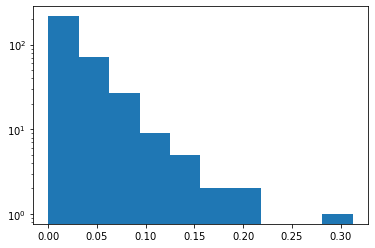

In [209]:
# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

### Visualize the degree centrality distribution of the forums projection

In [210]:
# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

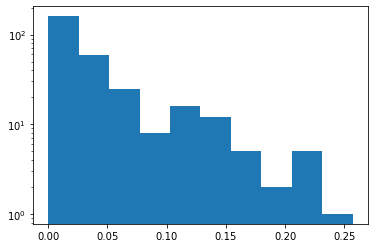

In [211]:
# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show() 

## Time based filtering


In [212]:
from datetime import datetime, timedelta
year = 2011
month = 11
day1 = 10
day2 = 6
date1 = datetime(year, month, day1)
date2 = datetime(year, month, day2)
date1 > date2

True


### Time filter on edges



In [213]:
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])

In [214]:
show_graph(G_sub)

nodes: 627 edges: 8 <class 'networkx.classes.graph.Graph'>
node : ('s55', {'bipartite': 'student'})
edge : ('s89', 'f32', {'date': Timestamp('2004-05-15 22:07:44')})


### Visualize filtered graph using nxviz

In [215]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.nodes[n]['dc'] = dcs[n]

In [216]:
dcs

{'f125': 0.0029940119760479044,
 'f5': 0.0029940119760479044,
 'f29': 0.0029940119760479044,
 'f433': 0.005988023952095809,
 'f255': 0.011976047904191617,
 'f22': 0.005988023952095809,
 'f128': 0.0029940119760479044,
 'f330': 0.005988023952095809,
 'f501': 0.0029940119760479044,
 'f184': 0.008982035928143714,
 'f452': 0.005988023952095809,
 'f308': 0.0029940119760479044,
 'f36': 0.0029940119760479044,
 'f225': 0.0029940119760479044,
 'f150': 0.005988023952095809,
 'f416': 0.005988023952095809,
 'f43': 0.05089820359281438,
 'f227': 0.0029940119760479044,
 'f116': 0.005988023952095809,
 'f256': 0.005988023952095809,
 'f130': 0.014970059880239521,
 'f27': 0.014970059880239521,
 'f326': 0.0029940119760479044,
 'f502': 0.0029940119760479044,
 'f458': 0.0029940119760479044,
 'f57': 0.005988023952095809,
 'f367': 0.011976047904191617,
 'f287': 0.005988023952095809,
 'f242': 0.005988023952095809,
 'f236': 0.005988023952095809,
 'f3': 0.005988023952095809,
 'f463': 0.0029940119760479044,
 'f352

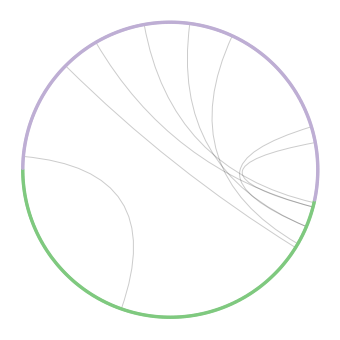

In [217]:
# Create the CircosPlot object: c
c = nv.CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show()  

<i>We see that the most connected users overall aren't posting to the most popular forums early on. This trend may change as we go forward.</i>

### Time series analysis


In [218]:
date1 = datetime(2011, 11, 10, 0, 0)
date1

datetime.datetime(2011, 11, 10, 0, 0)

In [219]:
days = 4
td = timedelta(days)
date1 + td

datetime.datetime(2011, 11, 14, 0, 0)

### Plot number of posts being made over time


First off, you will use the graph data to quantify the number of edges that show up within a chunking time window of td days, which is 2 days in the exercise below.

In [220]:
dayone = datetime(2004, 5, 14, 0, 0)
lastday = datetime(2004, 10, 26, 0, 0)

In [221]:
# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    # Increment the curr_day by the time delta
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


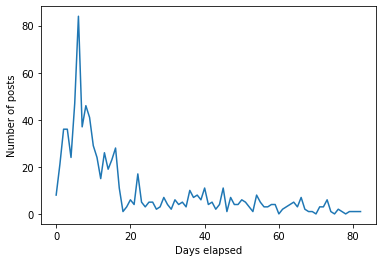

In [222]:
# Create the plot 
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()

### Extract the mean degree centrality day-by-day on the students partition
Here, you're going to see if the mean degree centrality over all nodes is correlated with the number of edges that are plotted over time. There might not necessarily be a strong correlation, and you'll take a look to see if that's the case.

In [223]:
# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


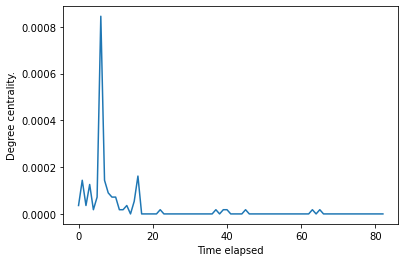

In [224]:
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

### Find the most popular forums day-by-day:

We're going to see how many forums took the title of "the most popular forum" on any given time window.

In [225]:
# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


 Now, you're going to finish that exercise - that is, you'll find out how many forums had the most popular forum score on a per-day basis!

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


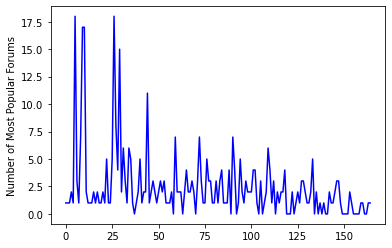

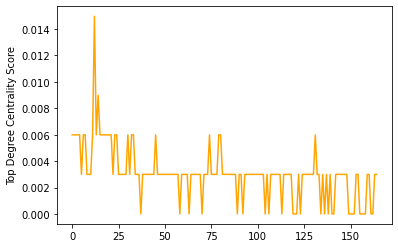

In [226]:
most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()

<i>On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further questions might include - was it the same set over time? Or were some forums really popular early on and others popular later on?</i>